In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [3]:
df_sld = pd\
    .read_csv(
        'relacionamento_clusters.csv',
        dtype={
            'cod_carteira': str,
            'desc_cnae': str
        }
    )
df_sld = df_sld\
    .astype(
        {
            col: str 
            for col in df_sld\
                .columns[
                    df_sld.columns.str.startswith(
                        ('prod_', 'flg_', 'fone',
                         'mobi', 'ib', 'cod',
                         'possui', 'digital',
                         'num_conta', 'Grupos',
                         'cad_pix', 'num_cpf', 'ano',
                         'num_ano')
                    )
                ]\
                .tolist()
        })
    

df_sld_num_cols_cpf = df_sld\
    .loc[:, df_sld.select_dtypes(include=np.number).columns.tolist() + ['num_cpf_cnpj']]\
    .rename(columns={'renda_mensal': 'renda_mensal_gabriel'})\
    .drop(columns=['alavancagem'])

In [44]:
df = pd\
    .read_csv(
        'cluster_personas.csv',
        dtype={
            'cod_carteira': str,
            'desc_cnae': str,
            'num_cpf_cnpj': str
        }
    )

df = df\
    .astype(
        {
            col: str 
            for col in df\
                .columns[
                    df.columns.str.startswith(
                        ('prod_', 'flg_', 'fone',
                         'mobi', 'ib', 'cod',
                         'possui', 'digital',
                         'num_conta', 'Grupos',
                         'cad_pix', 'num_cpf', 'ano',
                         'num_ano')
                    )
                ]\
                .tolist()
        }
    )\
    .drop(columns=df_sld_num_cols_cpf\
        .drop(columns=['renda_mensal_gabriel', 'num_cpf_cnpj'])\
        .columns\
        .tolist()
    )\
    .merge(
        df_sld_num_cols_cpf,
        on='num_cpf_cnpj',
        how='left'
    )
df = df\
    .astype(
        {
            col: str
            for col in df\
                .columns[
                    df.columns.str.startswith(
                        ('prod_', 'flg_', 'fone',
                         'mobi', 'ib', 'cod',
                         'possui', 'digital',
                         'num_conta', 'Grupos',
                         'cad_pix', 'num_cpf', 'ano',
                         'num_ano')
                    )
                ]\
                .tolist()
        }
    )\
    .drop(columns=['vlr_prej_cred_rural', 'mc_seguro_rural'])
    

In [36]:
df_sld_personas = df.filter(regex='^Personalizar|^renda_mensal$|^idade|sld_')

In [37]:
sld_prods = df\
    .loc[:, df.columns.str.startswith(('Personalizar', 'prod_'))]\
    .set_index('Personalizar')\
    .stack()\
    .reset_index()\
    .rename(
        columns={
            'level_1': 'produto',
            0: 'possui'
        }
    )\
    .groupby(['Personalizar', 'produto'])\
    .possui.sum().reset_index()

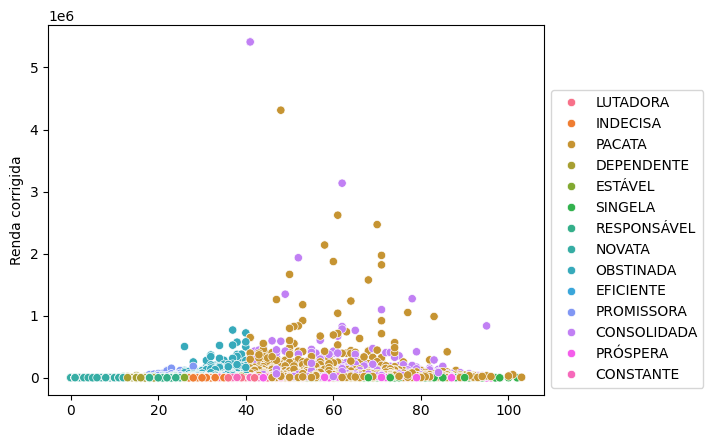

In [38]:
sns.scatterplot(
    data=df,
    x='idade',
    y='Renda corrigida',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

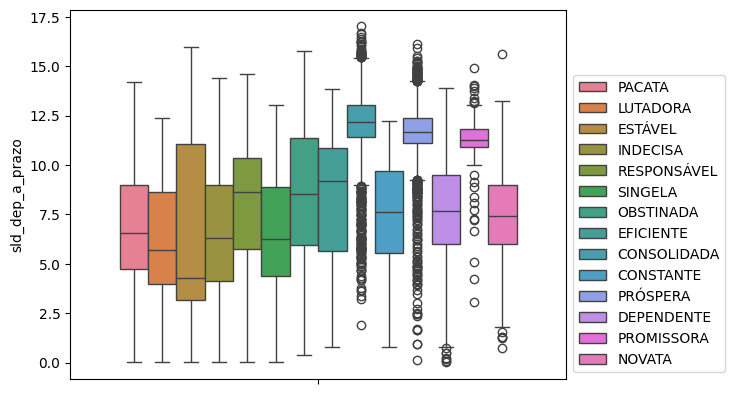

In [7]:
sns.boxplot(
    data=df\
        .assign(sld_dep_a_prazo=lambda x: np.log1p(x.sld_dep_a_prazo))\
        .query('sld_dep_a_prazo != 0'),
    y='sld_dep_a_prazo',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

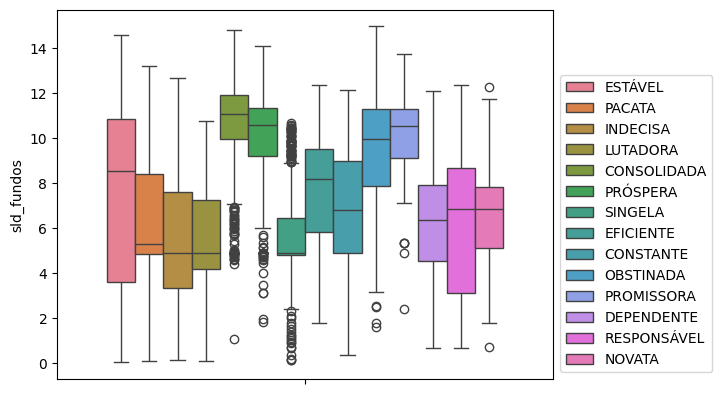

In [8]:
sns.boxplot(
    data=df\
        .assign(sld_fundos=lambda x: np.log1p(x.sld_fundos))\
        .query('sld_fundos != 0'),
    y='sld_fundos',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

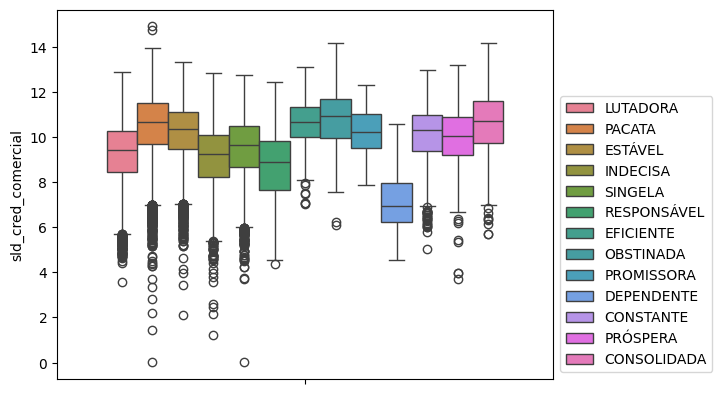

In [9]:
sns.boxplot(
    data=df\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
    y='sld_cred_comercial',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

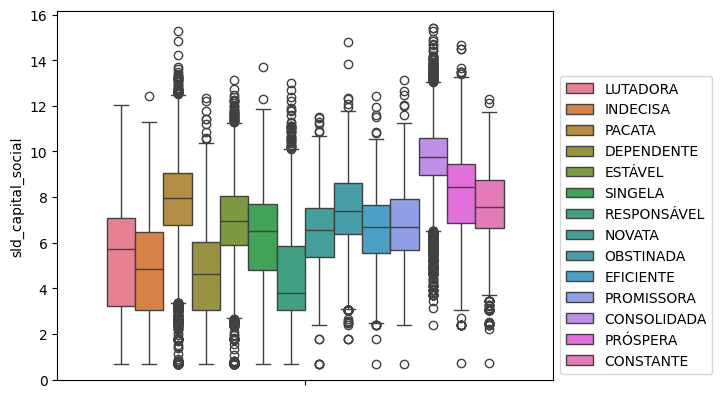

In [10]:
sns.boxplot(
    data=df\
        .assign(sld_capital_social=lambda x: np.log1p(x.sld_capital_social))\
        .query('sld_capital_social != 0'),
    y='sld_capital_social',
    hue='Personalizar'
    )
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

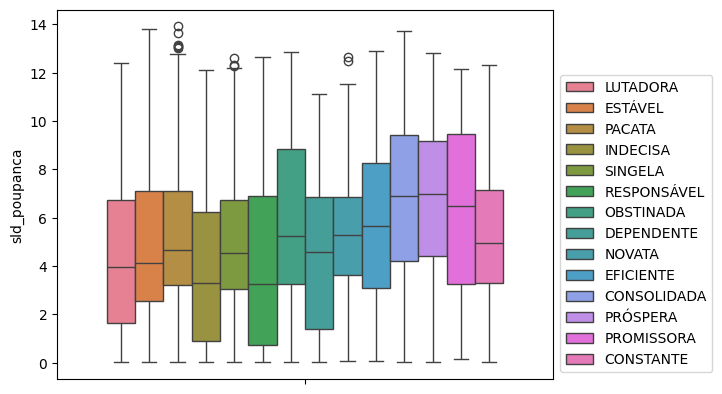

In [11]:
sns.boxplot(
    data=df\
        .assign(sld_poupanca=lambda x: np.log1p(x.sld_poupanca))\
        .query('sld_poupanca != 0'),
    y='sld_poupanca',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

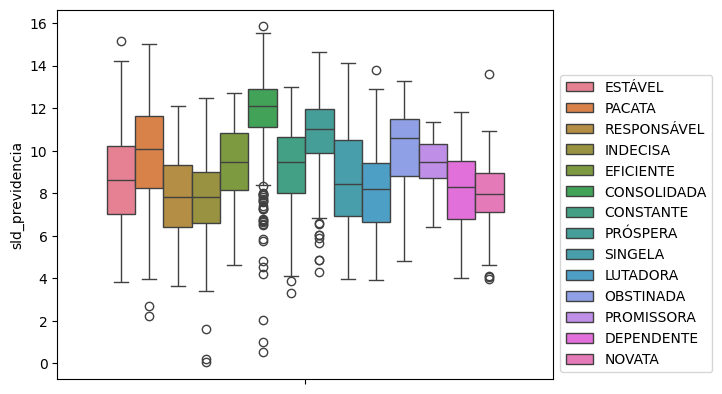

In [12]:
sns.boxplot(
    data=df\
        .assign(sld_previdencia=lambda x: np.log1p(x.sld_previdencia))\
        .query('sld_previdencia != 0'),
    y='sld_previdencia',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

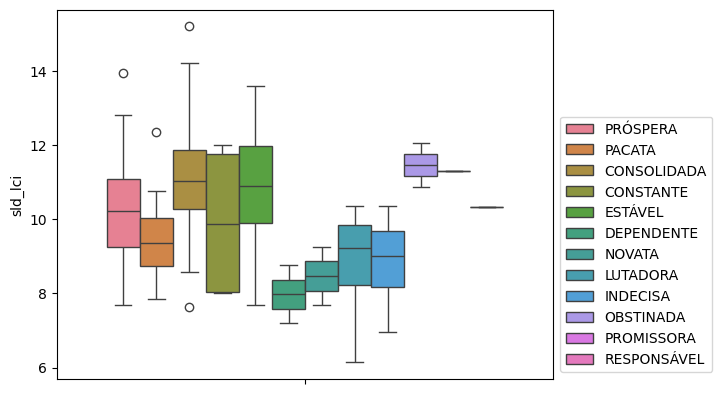

In [13]:
sns.boxplot(
    data=df\
        .assign(sld_lci=lambda x: np.log1p(x.sld_lci))\
        .query('sld_lci != 0'),
    y='sld_lci',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

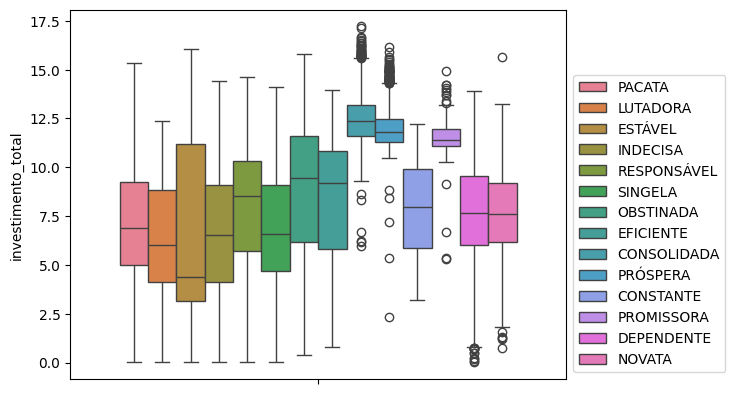

In [14]:
sns.boxplot(
    data=df\
        .assign(investimento_total=lambda x: np.log1p(x.investimento_total))\
        .query('investimento_total != 0'),
    y='investimento_total',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

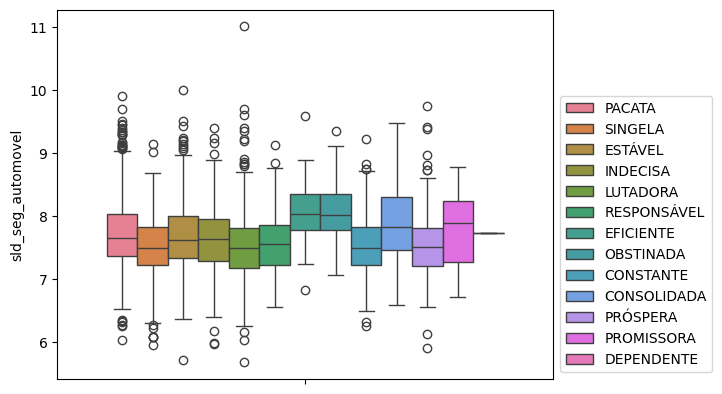

In [15]:
sns.boxplot(
    data=df\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
    y='sld_seg_automovel',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

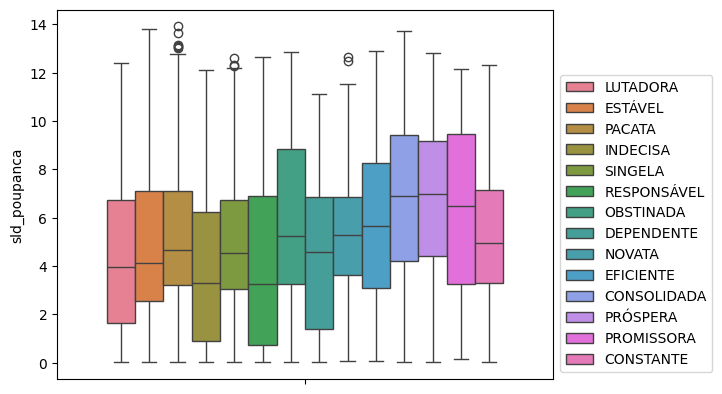

In [16]:
sns.boxplot(
    data=df\
        .assign(sld_poupanca=lambda x: np.log1p(x.sld_poupanca))\
        .query('sld_poupanca != 0'),
    y='sld_poupanca',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


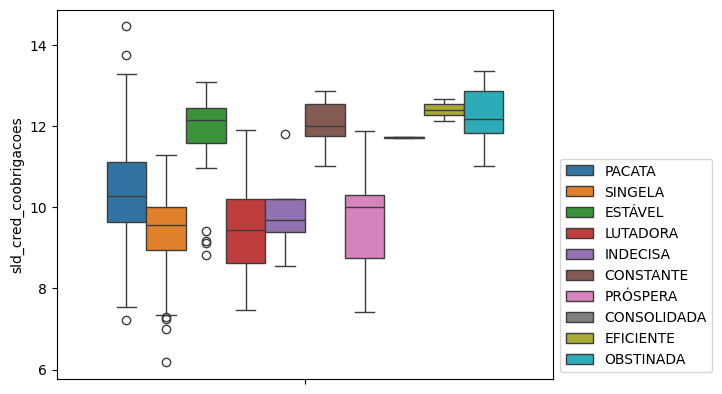

In [17]:
sns.boxplot(
    data=df\
        .assign(sld_cred_coobrigacoes=lambda x: np.log1p(x.sld_cred_coobrigacoes))\
        .query('sld_cred_coobrigacoes != 0'),
    y='sld_cred_coobrigacoes',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


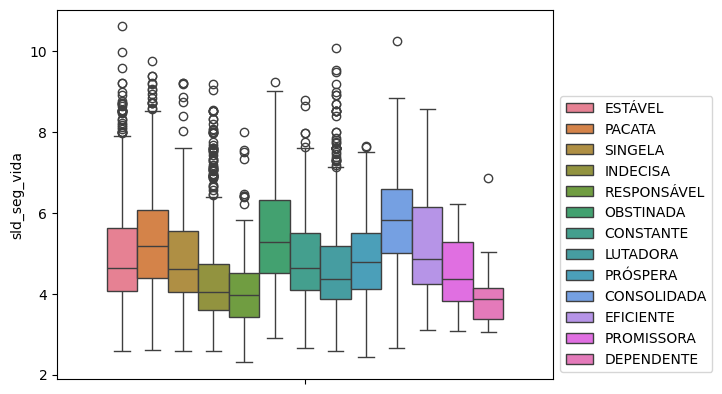

In [18]:
sns.boxplot(
    data=df\
        .assign(sld_seg_vida=lambda x: np.log1p(x.sld_seg_vida))\
        .query('sld_seg_vida != 0'),
    y='sld_seg_vida',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


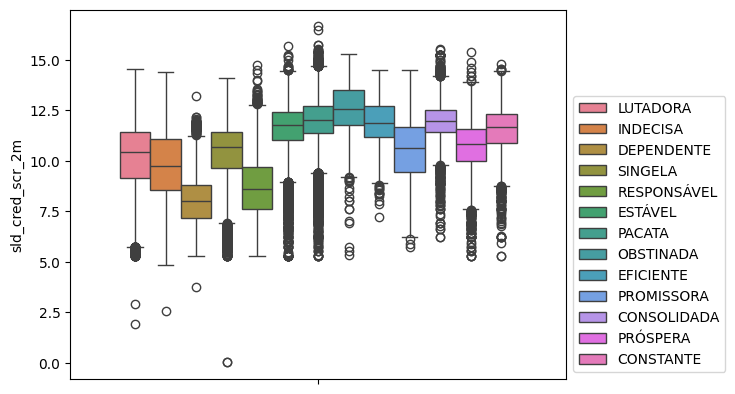

In [19]:
sns.boxplot(
    data=df\
        .assign(sld_cred_scr_2m=lambda x: np.log1p(x.sld_cred_scr_2m))\
        .query('sld_cred_scr_2m != 0'),
    y='sld_cred_scr_2m',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


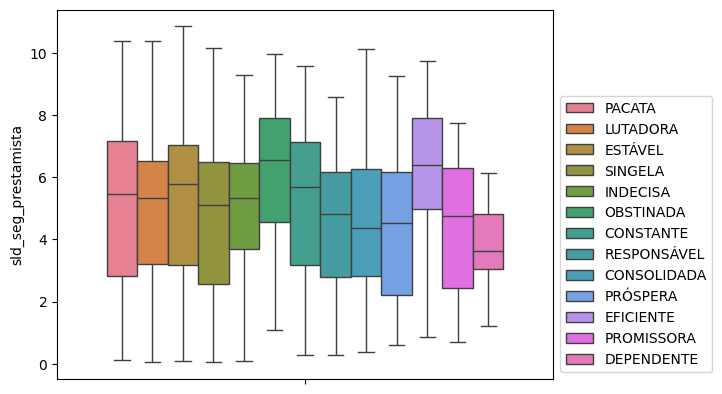

In [20]:
sns.boxplot(
    data=df\
        .assign(sld_seg_prestamista=lambda x: np.log1p(x.sld_seg_prestamista))\
        .query('sld_seg_prestamista != 0'),
    y='sld_seg_prestamista',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


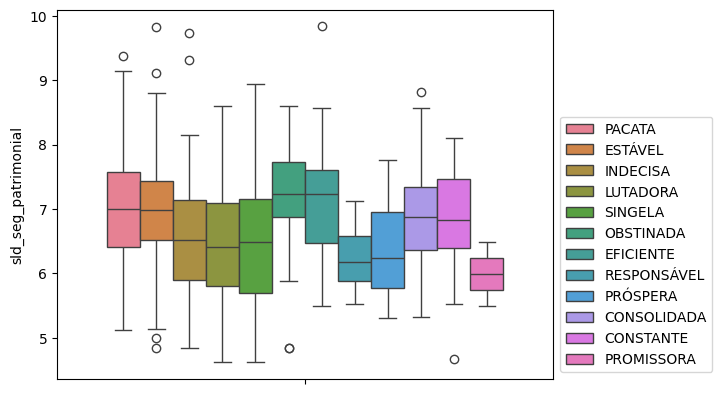

In [21]:
sns.boxplot(
    data=df\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


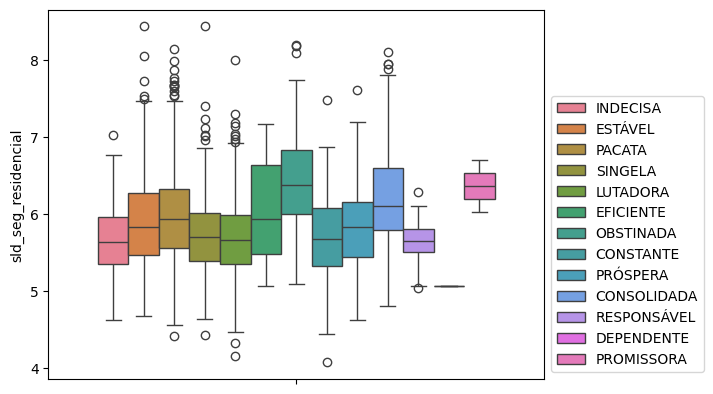

In [22]:
sns.boxplot(
    data=df\
        .assign(sld_seg_residencial=lambda x: np.log1p(x.sld_seg_residencial))\
        .query('sld_seg_residencial != 0'),
    y='sld_seg_residencial',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


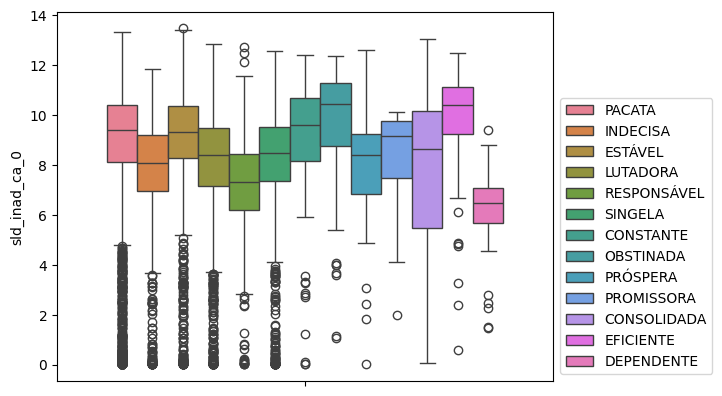

In [ ]:
sns.boxplot(
    data=df\
        .assign(sld_inad_ca_0=lambda x: np.log1p(x.sld_inad_ca_0))\
        .query('sld_inad_ca_0 != 0'),
    y='sld_inad_ca_0',
    hue='personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


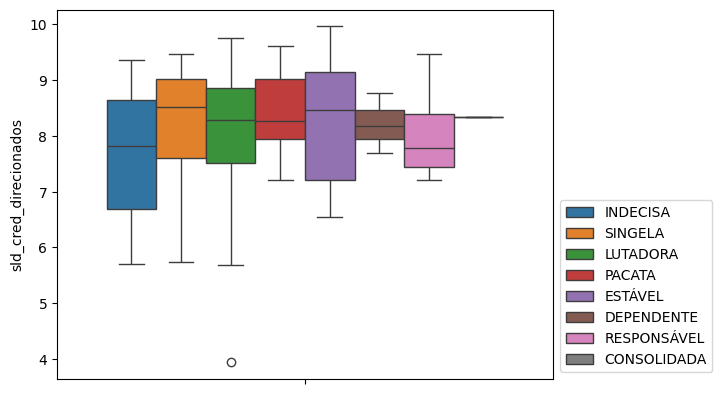

In [24]:
sns.boxplot(
    data=df\
        .assign(sld_cred_direcionados=lambda x: np.log1p(x.sld_cred_direcionados))\
        .query('sld_cred_direcionados != 0'),
    y='sld_cred_direcionados',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


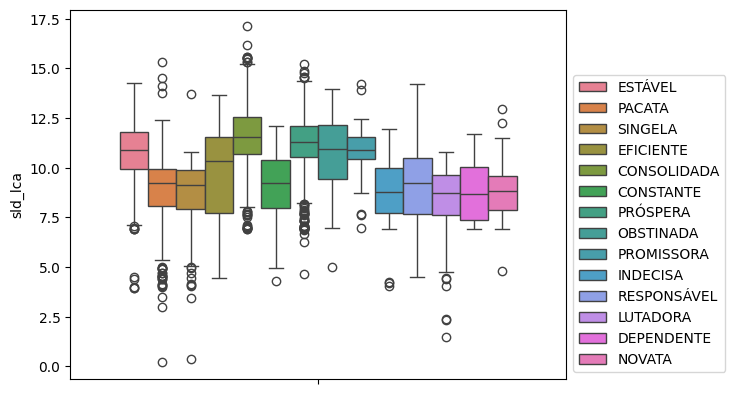

In [25]:
sns.boxplot(
    data=df\
        .assign(sld_lca=lambda x: np.log1p(x.sld_lca))\
        .query('sld_lca != 0'),
    y='sld_lca',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


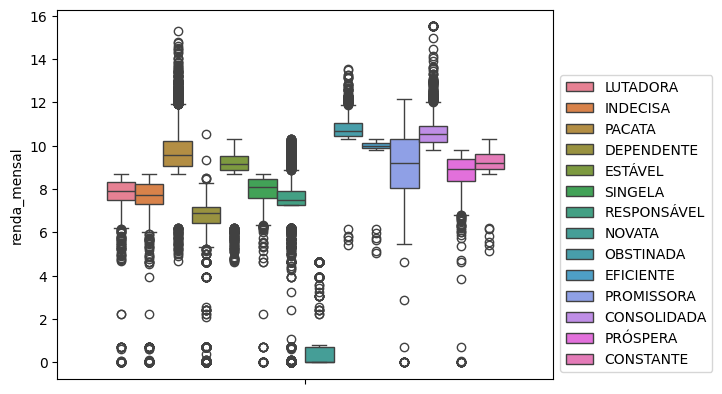

In [26]:
sns.boxplot(
    data=df\
        .assign(renda_mensal=lambda x: np.log1p(x.renda_mensal)),
    y='renda_mensal',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


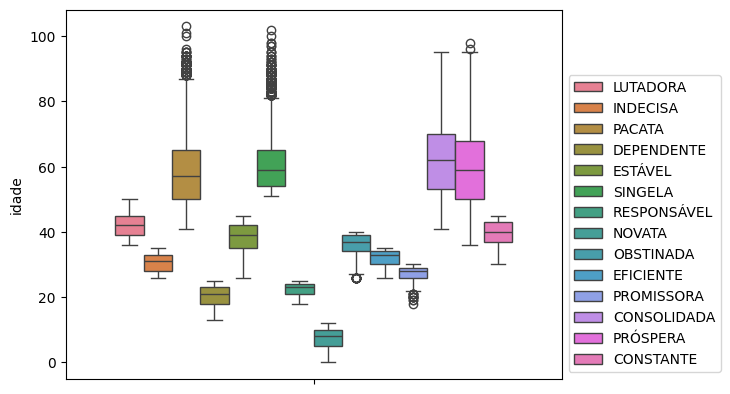

In [27]:
sns.boxplot(
    data=df,
    y='idade',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

In [135]:
df.groupby(['idade']).size().sort_values()

idade
101.0       1
102.0       1
103.0       1
96.0        2
97.0        2
         ... 
39.0     4582
40.0     4643
43.0     4848
41.0     4886
42.0     5157
Length: 103, dtype: int64

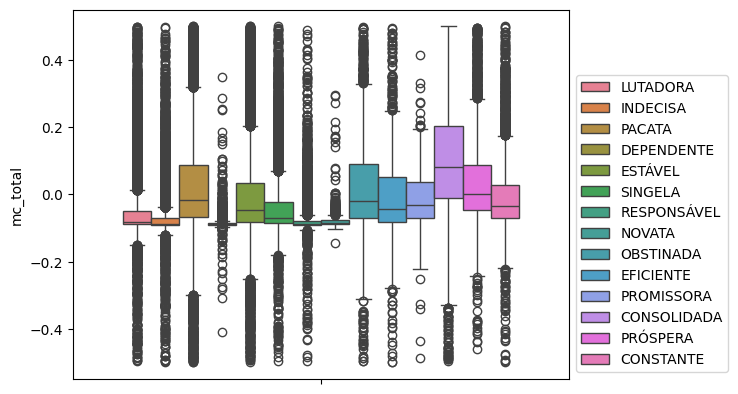

In [28]:
sns.boxplot(
    data=df\
        .assign(mc_total=lambda x: (x.mc_total - x.mc_total.mean()) / x.mc_total.std())\
        .query('(mc_total < .5) and (mc_total > -.5)'),
    y='mc_total',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

## Proporção de personas por cooperativa

In [45]:
persona_por_coop = df\
    .groupby(['Personalizar', 'cod_coop'])\
    .size().reset_index(name='quantidade')\
    .sort_values('quantidade')\
    .assign(
        prop=lambda x: (
            x.quantidade / x
            .groupby(['cod_coop'])
            .quantidade
            .transform('sum') * 100
        )
    )\
    .sort_values('prop')

In [47]:
num_columns = df\
    .select_dtypes(include=np.number)

In [51]:
corr = num_columns.corr('spearman')

## PROMISSORA

In [145]:
df_promissora = df.query('Personalizar == "PROMISSORA"')
na_prom = df_promissora.select_dtypes(include=np.number).corr('spearman').renda_mensal
df_promissora = df_promissora\
    .drop(columns=na_prom[na_prom.isna()].index)

In [193]:
df_cluster_promissora = df_promissora\
    .loc[:, [
        #'idade', 'Renda corrigida',
        'isa', 'sld_previdencia',
        'sld_inad_ca_0', 
        'investimento_total',
        'tempo_assoc', 'score_principalidade',
        ] +
        df_promissora.columns[df_promissora.columns.str.startswith('sld_seg')].tolist() +
        df_promissora.columns[df_promissora.columns.str.startswith('sld_cred')].tolist() +
        df_promissora.columns[df_promissora.columns.str.startswith('mc_') & ~df_promissora.columns.isin([
            'mc_assoc', 'mc_assoc_6_meses', 'mc_total'
        ])].tolist() +
        df_promissora.filter(like='vlr_prej').columns.tolist()
    ]

df_cluster_promissora = df_cluster_promissora.loc[:, ~df_cluster_promissora.columns.str.startswith('mc_')]
df_cluster_promissora_columns = df_cluster_promissora.columns.tolist()
df_cluster_promissora = pd.DataFrame(
    StandardScaler().fit_transform(df_cluster_promissora),
    columns=df_cluster_promissora_columns
    )

In [194]:
def plot_inercia(data):
    range_n_clusters = range(1, 11)
    inertia = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(
            n_clusters=n_clusters,
            random_state=42,
            tol=1e-16,
            max_iter=5000
            )
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range_n_clusters, inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.xticks(range_n_clusters)
    plt.grid(True)
    plt.show()

In [196]:
def choose_seed(data, n_clusters=7):
    for seed in range(101):
        kmeans = KMeans(
            n_clusters=n_clusters,
            max_iter=5000,
            tol=1e-16,
            random_state=seed
        ).fit(data)
        _, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
        print(f"Number of elements assigned to each cluster: {cluster_sizes}, {seed}")

In [198]:
choose_seed(df_cluster_promissora, 5)

Number of elements assigned to each cluster: [ 40 113   4   9  94], 0
Number of elements assigned to each cluster: [139  29   1  87   4], 1
Number of elements assigned to each cluster: [ 29 113  10   2 106], 2
Number of elements assigned to each cluster: [112  34  10   1 103], 3
Number of elements assigned to each cluster: [  8 131 118   2   1], 4
Number of elements assigned to each cluster: [ 13  47   1 197   2], 5
Number of elements assigned to each cluster: [130 119   1   6   4], 6
Number of elements assigned to each cluster: [ 44  13 196   1   6], 7
Number of elements assigned to each cluster: [ 30 116   1   7 106], 8
Number of elements assigned to each cluster: [203  49   1   5   2], 9
Number of elements assigned to each cluster: [  8 241   1   4   6], 10
Number of elements assigned to each cluster: [129 121   1   4   5], 11
Number of elements assigned to each cluster: [ 43 147  63   5   2], 12
Number of elements assigned to each cluster: [ 65   1  51   7 136], 13
Number of elemen

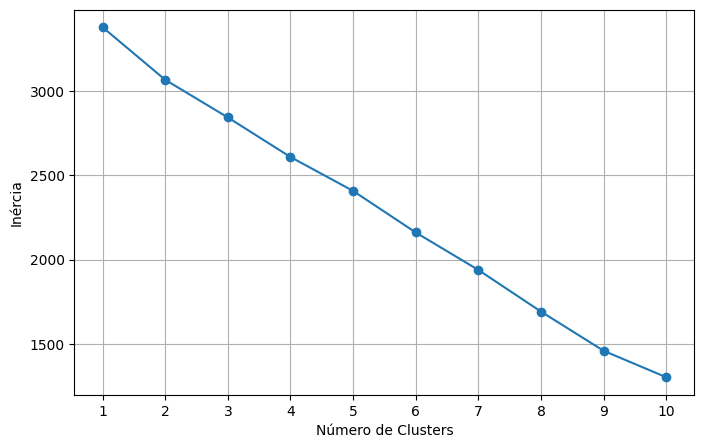

In [197]:
plot_inercia(df_cluster_promissora)

In [199]:
kmeans_promissora = KMeans(
    n_clusters=5,
    tol=1e-16,
    max_iter=5000,
    random_state=58
    ).fit(df_cluster_promissora)
df_promissora = df_promissora.assign(
    subgrupo=kmeans_promissora.labels_
    )\
    .sort_values('subgrupo')\
    .astype({'subgrupo': str})

<Axes: >

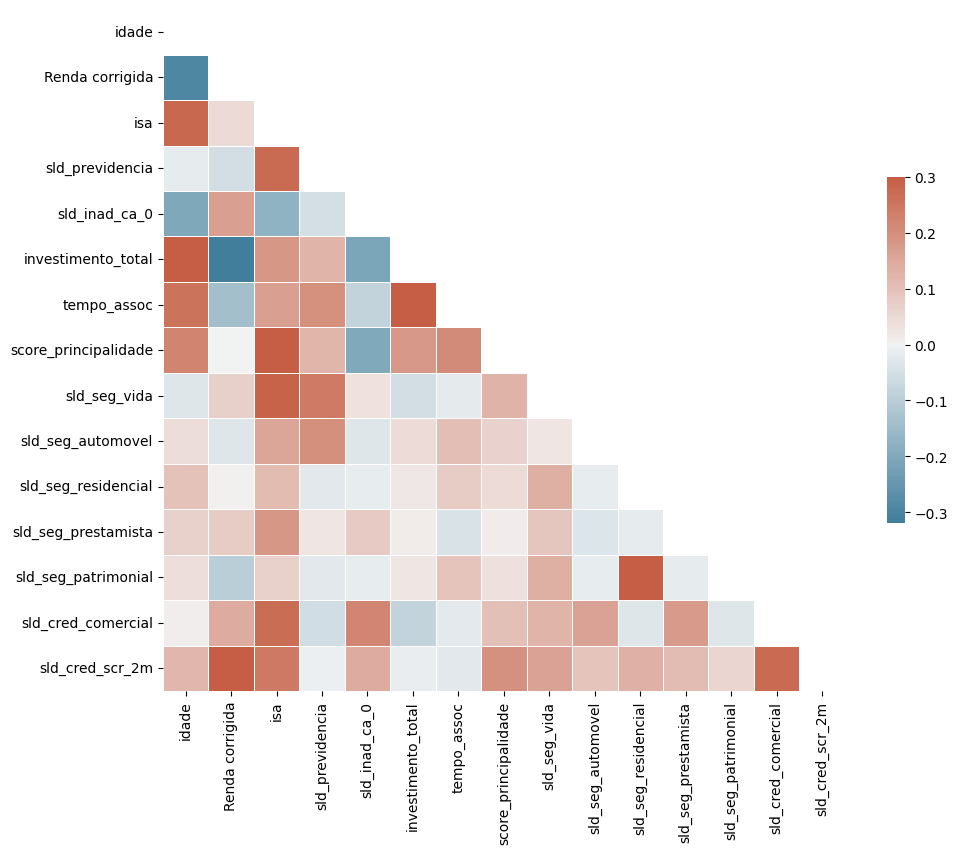

In [188]:
corr = df_cluster_promissora.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

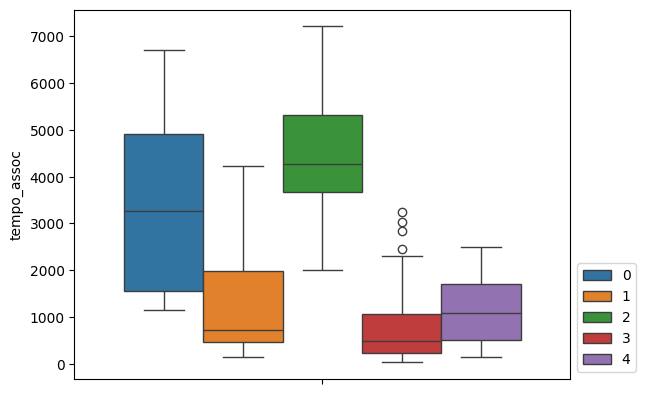

In [200]:
sns.boxplot(
    data=df_promissora\
        .assign(tempo_assoc=lambda x: x.tempo_assoc),
    y='tempo_assoc',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

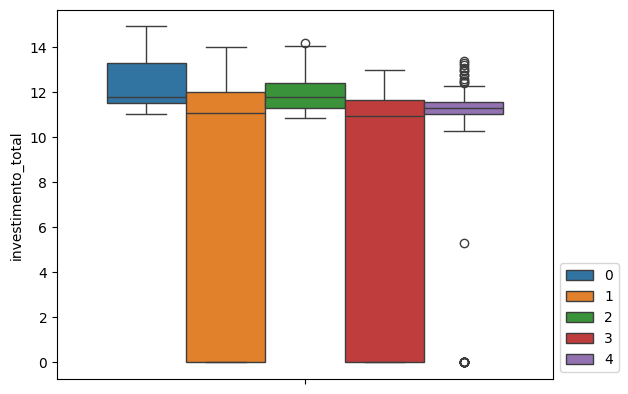

In [201]:
sns.boxplot(
    data=df_promissora\
        .assign(investimento_total=lambda x: np.log1p(x.investimento_total)),
    y='investimento_total',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

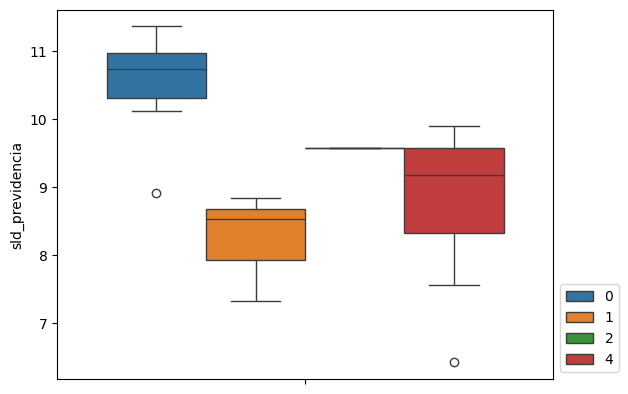

In [202]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_previdencia=lambda x: np.log1p(x.sld_previdencia))\
        .query('sld_previdencia != 0'),
    y='sld_previdencia',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

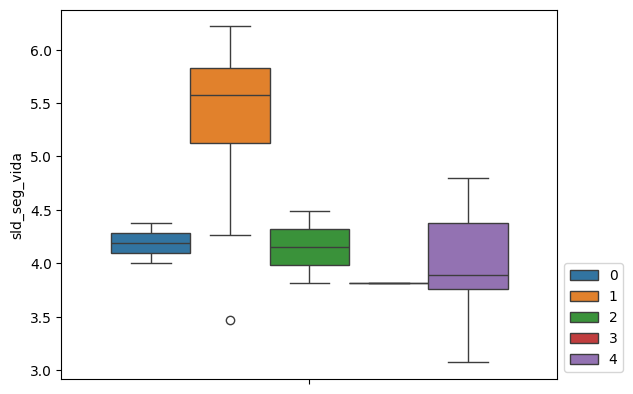

In [207]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_seg_vida=lambda x: np.log1p(x.sld_seg_vida))\
        .query('sld_seg_vida != 0'),
    y='sld_seg_vida',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

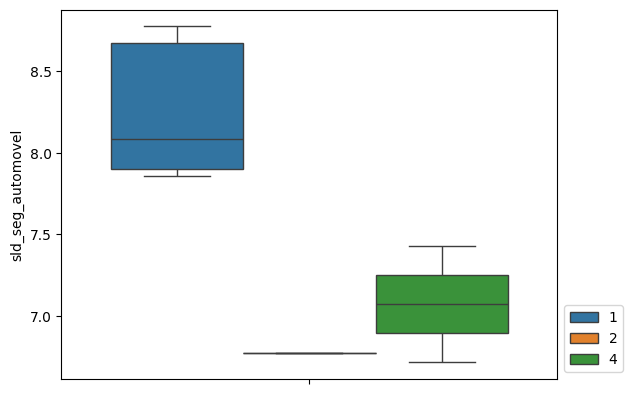

In [208]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
    y='sld_seg_automovel',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

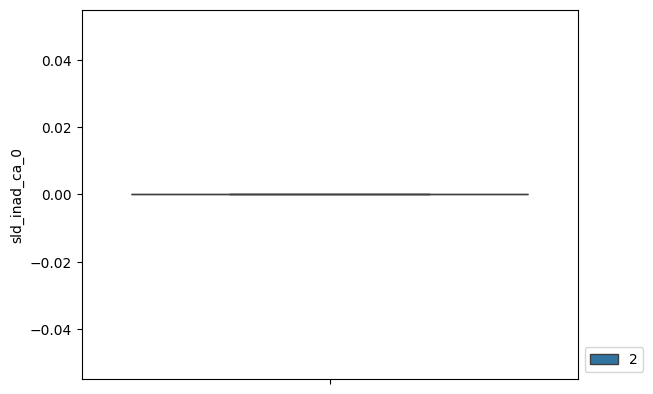

In [209]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_seg_residencial=lambda x: np.log1p(x.sld_seg_residencial))\
        .query('sld_seg_residencial != 0'),
    y='sld_inad_ca_0',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

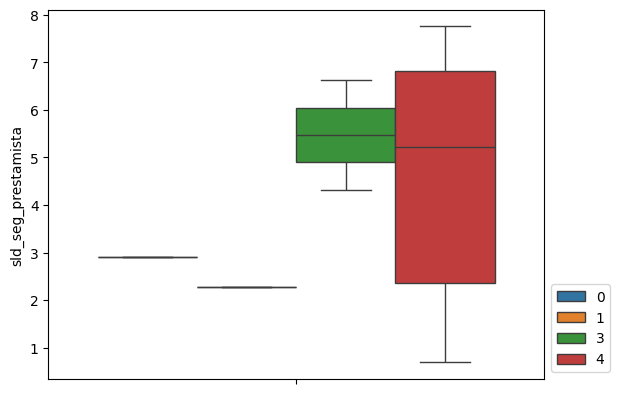

In [213]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_seg_prestamista=lambda x: np.log1p(x.sld_seg_prestamista))\
        .query('sld_seg_prestamista != 0'),
    y='sld_seg_prestamista',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

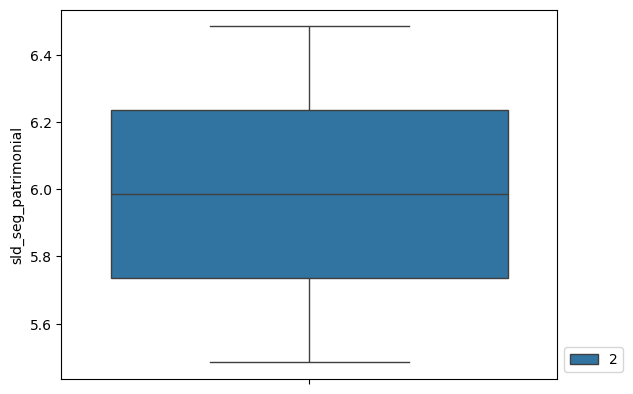

In [214]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

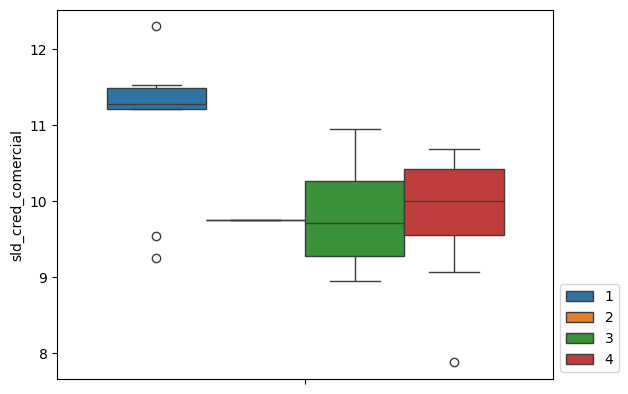

In [215]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
    y='sld_cred_comercial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

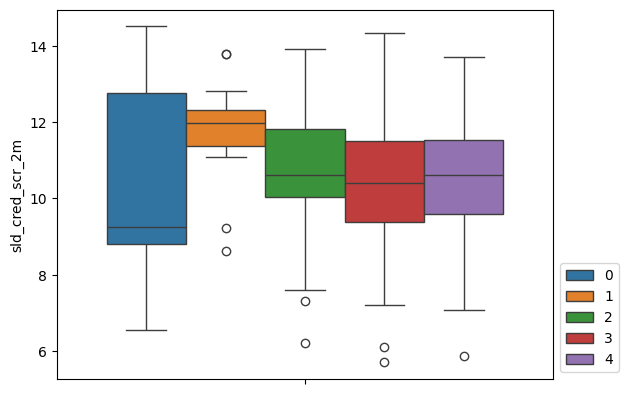

In [216]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_cred_scr_2m=lambda x: np.log1p(x.sld_cred_scr_2m))\
        .query('sld_cred_scr_2m != 0'),
    y='sld_cred_scr_2m',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

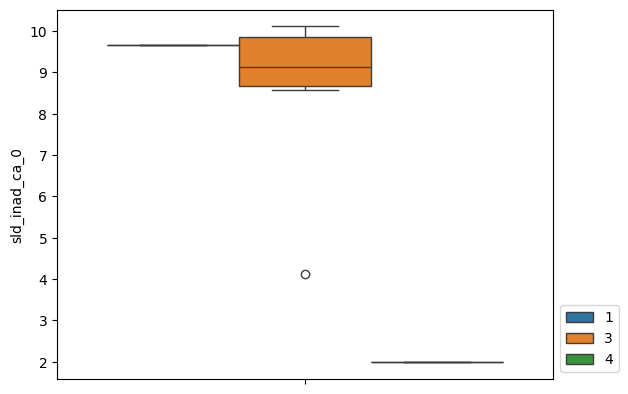

In [203]:
sns.boxplot(
    data=df_promissora\
        .assign(sld_inad_ca_0=lambda x: np.log1p(x.sld_inad_ca_0))\
        .query('sld_inad_ca_0 != 0'),
    y='sld_inad_ca_0',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

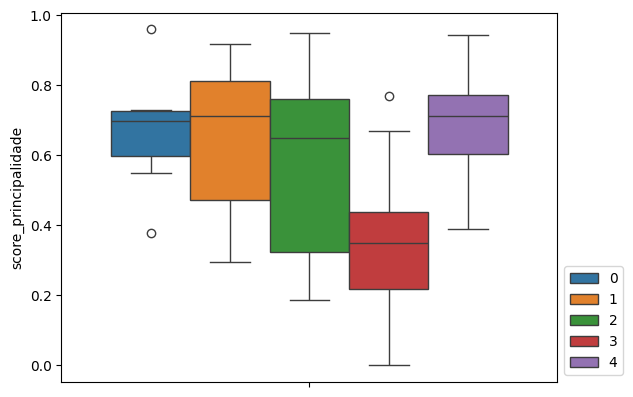

In [205]:
sns.boxplot(
    data=df_promissora,
    y='score_principalidade',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

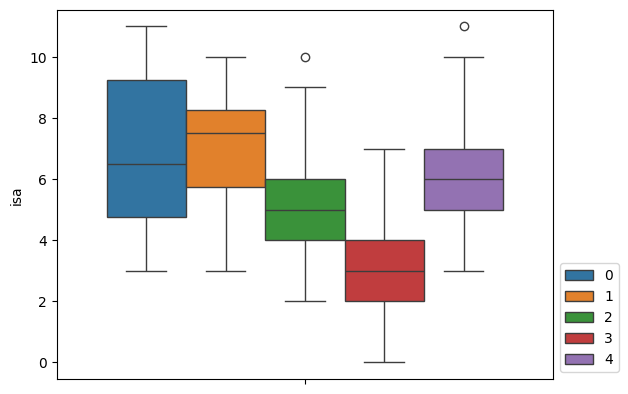

In [206]:
sns.boxplot(
    data=df_promissora,
    y='isa',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

## Eficiente

In [218]:
df_eficiente = df.query('Personalizar == "EFICIENTE"')
na_efic = df_eficiente.select_dtypes(include=np.number).corr('spearman').renda_mensal
df_eficiente = df_eficiente\
    .drop(columns=na_efic[na_efic.isna()].index)

In [235]:
df_cluster_eficiente = df_eficiente\
    .loc[:, [
        'isa', 'sld_previdencia',
        'sld_inad_ca_0', 
        'investimento_total',
        #'tempo_assoc',
        #'score_principalidade',
        ] +
        df_eficiente.columns[df_eficiente.columns.str.startswith('sld_seg')].tolist() +
        df_eficiente.columns[df_eficiente.columns.str.startswith('sld_cred')].tolist() +
        df_eficiente.columns[df_eficiente.columns.str.startswith('mc_') & ~df_eficiente.columns.isin([
            'mc_assoc', 'mc_assoc_6_meses', 'mc_total'
        ])].tolist() +
        df_eficiente.filter(like='vlr_prej').columns.tolist()
    ]

df_cluster_eficiente = df_cluster_eficiente.loc[:, ~df_cluster_eficiente.columns.str.startswith('mc_')]
df_cluster_eficiente_columns = df_cluster_eficiente.columns.tolist()
df_cluster_eficiente = pd.DataFrame(
    StandardScaler().fit_transform(df_cluster_eficiente),
    columns=df_cluster_eficiente_columns
    )

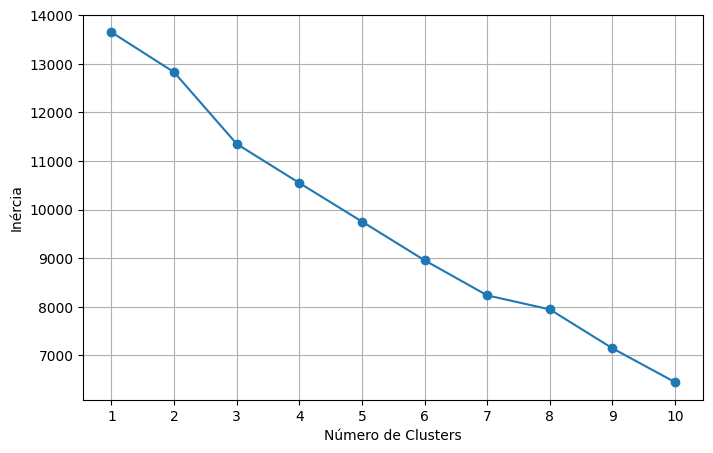

In [236]:
plot_inercia(df_cluster_eficiente)

In [238]:
choose_seed(df_cluster_eficiente, 5)

Number of elements assigned to each cluster: [879  42  17 110   2], 0
Number of elements assigned to each cluster: [919 124   4   2   1], 1
Number of elements assigned to each cluster: [923   2  11  75  39], 2
Number of elements assigned to each cluster: [997  15  27   6   5], 3
Number of elements assigned to each cluster: [ 44 355 619   2  30], 4
Number of elements assigned to each cluster: [ 37 879  12 121   1], 5
Number of elements assigned to each cluster: [879   9   2 122  38], 6
Number of elements assigned to each cluster: [537  36  46   2 429], 7
Number of elements assigned to each cluster: [ 37 879   2 123   9], 8
Number of elements assigned to each cluster: [536  71  17 396  30], 9
Number of elements assigned to each cluster: [892  26 114  17   1], 10
Number of elements assigned to each cluster: [738  63   9   4 236], 11
Number of elements assigned to each cluster: [850   2  27  12 159], 12
Number of elements assigned to each cluster: [975   2  33   1  39], 13
Number of elemen

In [239]:
kmeans_eficiente = KMeans(
    n_clusters=5,
    tol=1e-16,
    max_iter=5000,
    random_state=9
    ).fit(df_cluster_eficiente)
df_eficiente = df_eficiente.assign(
    subgrupo=kmeans_eficiente.labels_
    )\
    .sort_values('subgrupo')\
    .astype({'subgrupo': str})

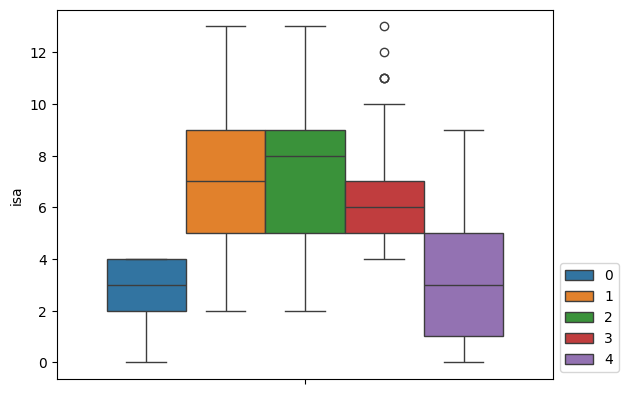

In [240]:
sns.boxplot(
    data=df_eficiente,
    y='isa',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

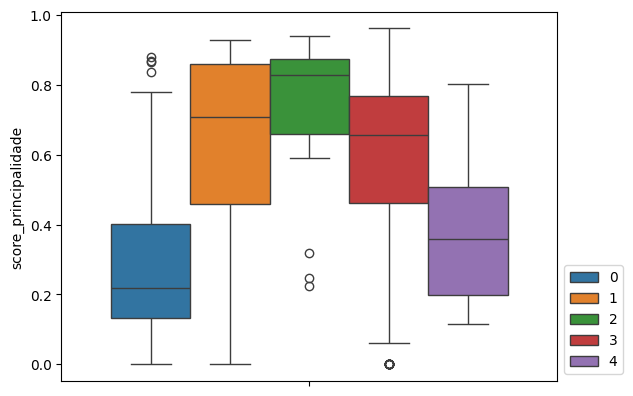

In [241]:
sns.boxplot(
    data=df_eficiente,
    y='score_principalidade',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

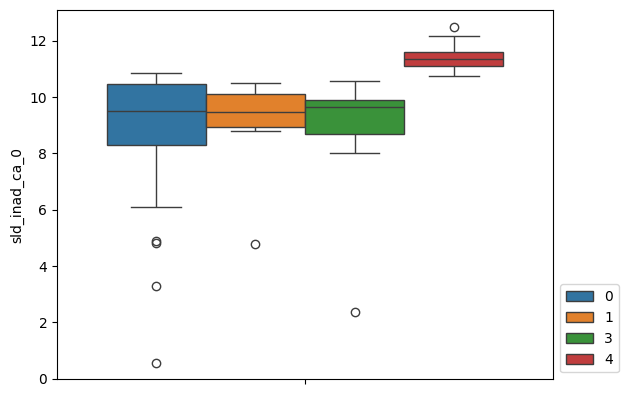

In [244]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_inad_ca_0=lambda x: np.log1p(x.sld_inad_ca_0))\
        .query('sld_inad_ca_0 != 0'),
    y='sld_inad_ca_0',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

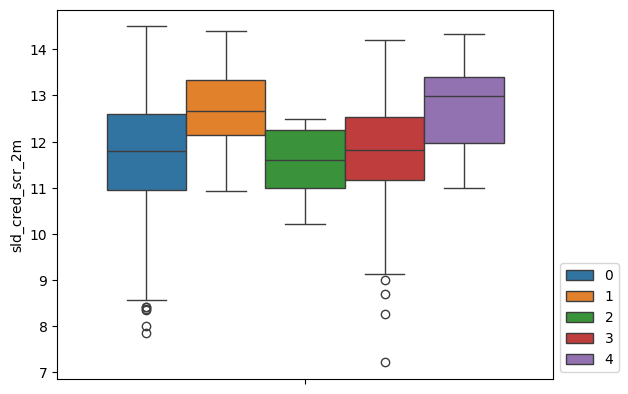

In [245]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_cred_scr_2m=lambda x: np.log1p(x.sld_cred_scr_2m))\
        .query('sld_cred_scr_2m != 0'),
    y='sld_cred_scr_2m',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

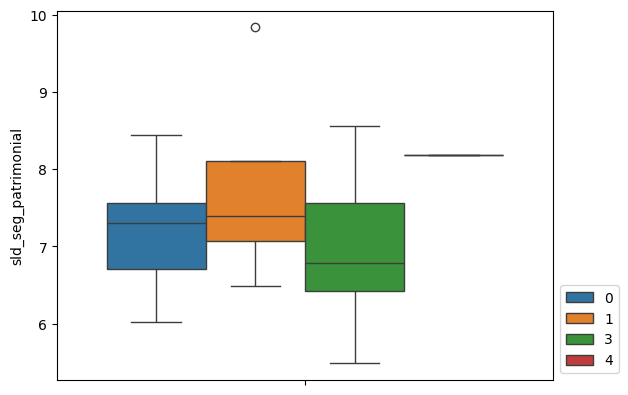

In [247]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

In [ ]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

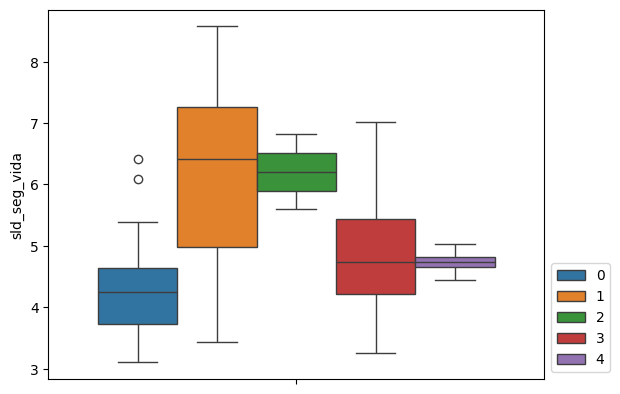

In [251]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_seg_vida=lambda x: np.log1p(x.sld_seg_vida))\
        .query('sld_seg_vida != 0'),
    y='sld_seg_vida',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

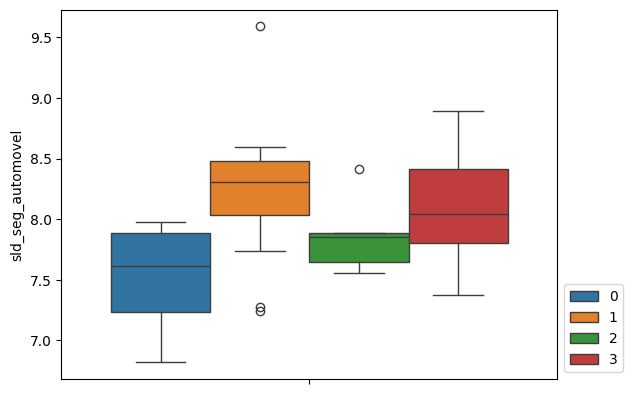

In [252]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
    y='sld_seg_automovel',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

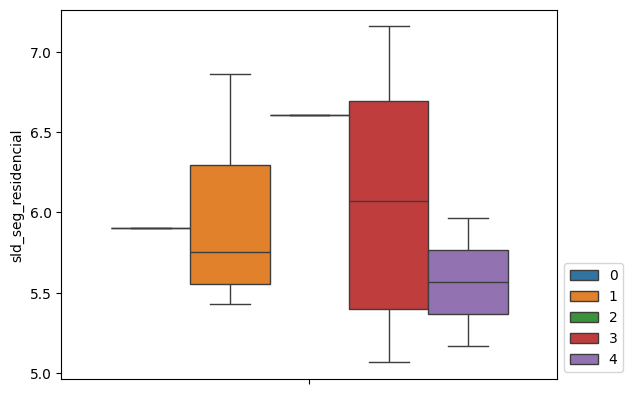

In [253]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_seg_residencial=lambda x: np.log1p(x.sld_seg_residencial))\
        .query('sld_seg_residencial != 0'),
    y='sld_seg_residencial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

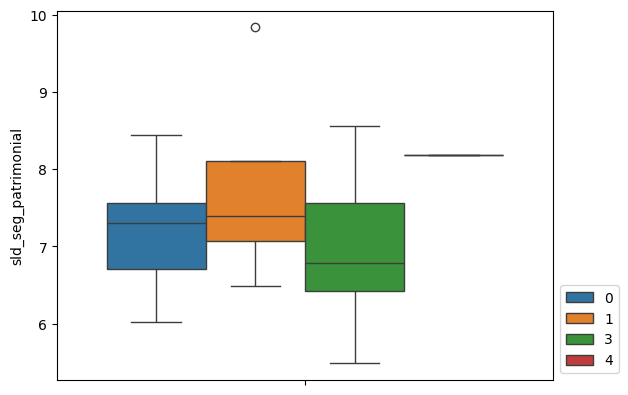

In [254]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

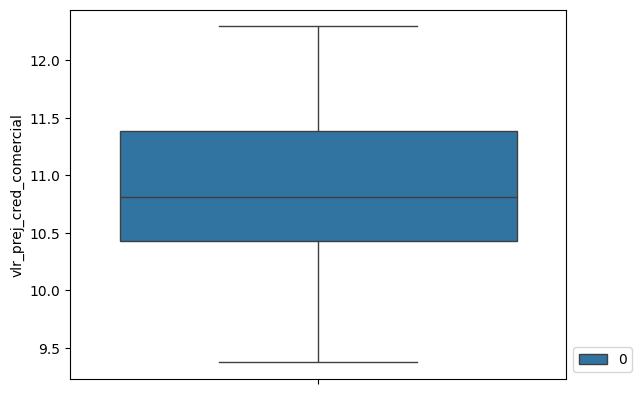

In [255]:
sns.boxplot(
    data=df_eficiente\
        .assign(vlr_prej_cred_comercial=lambda x: np.log1p(x.vlr_prej_cred_comercial))\
        .query('vlr_prej_cred_comercial != 0'),
    y='vlr_prej_cred_comercial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

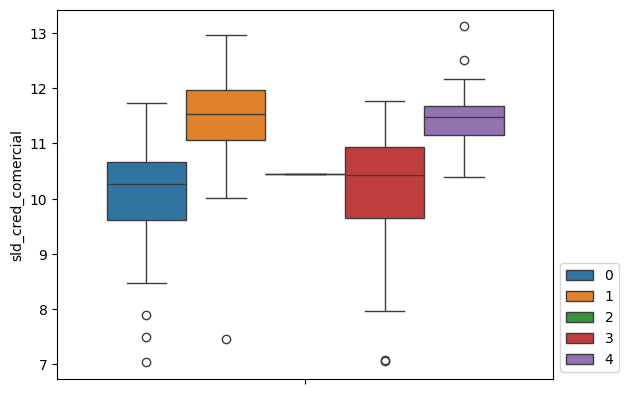

In [257]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
    y='sld_cred_comercial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

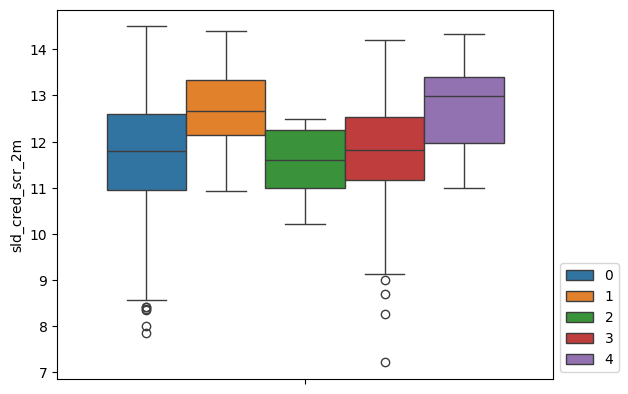

In [256]:
sns.boxplot(
    data=df_eficiente\
        .assign(sld_cred_scr_2m=lambda x: np.log1p(x.sld_cred_scr_2m))\
        .query('sld_cred_scr_2m != 0'),
    y='sld_cred_scr_2m',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

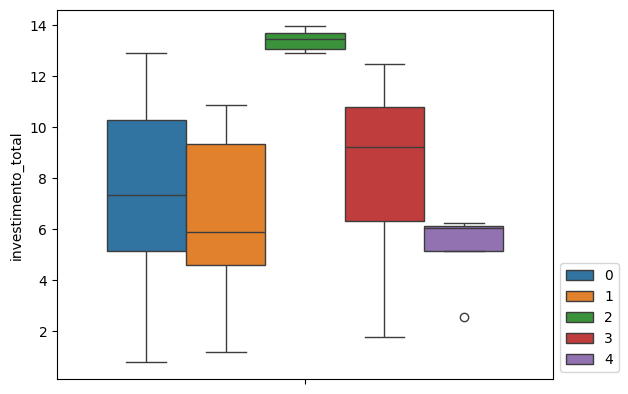

In [261]:
sns.boxplot(
    data=df_eficiente\
        .assign(investimento_total=lambda x: np.log1p(x.investimento_total))\
        .query('investimento_total != 0'),
    y='investimento_total',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

In [262]:
df.Personalizar.value_counts()

Personalizar
PACATA         41228
LUTADORA       30707
INDECISA       21563
ESTÁVEL        20412
SINGELA        16624
RESPONSÁVEL     7713
CONSOLIDADA     5080
CONSTANTE       4197
PRÓSPERA        4102
DEPENDENTE      3792
OBSTINADA       2105
NOVATA          1312
EFICIENTE       1050
PROMISSORA       260
Name: count, dtype: int64

## Dependente

In [264]:
df_dependente = df.query('Personalizar == "DEPENDENTE"')
na_dep = df_dependente.select_dtypes(include=np.number).corr('spearman').renda_mensal
df_dependente = df_dependente\
    .drop(columns=na_dep[na_dep.isna()].index)

In [278]:
df_cluster_dependente = df_dependente\
    .loc[:, [
        'isa', 'sld_previdencia',
        'sld_inad_ca_0', 
        'investimento_total'
        ] +
        df_dependente.columns[df_dependente.columns.str.startswith('sld_seg')].tolist() +
        df_dependente.columns[df_dependente.columns.str.startswith('sld_cred')].tolist() +
        df_dependente.columns[df_dependente.columns.str.startswith('mc_') & ~df_dependente.columns.isin([
            'mc_assoc', 'mc_assoc_6_meses', 'mc_total'
        ])].tolist() +
        df_dependente.filter(like='vlr_prej').columns.tolist()
    ]

df_cluster_dependente = df_cluster_dependente.loc[:, ~df_cluster_dependente.columns.str.startswith('mc_')]
df_cluster_dependente_columns = df_cluster_dependente.columns.tolist()
df_cluster_dependente = pd.DataFrame(
    StandardScaler().fit_transform(df_cluster_dependente),
    columns=df_cluster_dependente_columns
    )

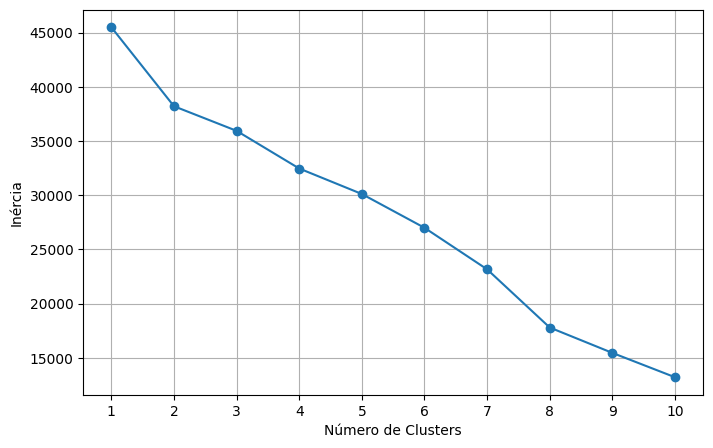

In [280]:
plot_inercia(df_cluster_dependente)

In [283]:
choose_seed(df_cluster_dependente, 5)

Number of elements assigned to each cluster: [3684    1   95    2   10], 0
Number of elements assigned to each cluster: [3693    1   88    1    9], 1
Number of elements assigned to each cluster: [1086 2702    1    1    2], 2
Number of elements assigned to each cluster: [2075    1   12   87 1617], 3
Number of elements assigned to each cluster: [  18 3770    1    1    2], 4
Number of elements assigned to each cluster: [3770    7    1   12    2], 5
Number of elements assigned to each cluster: [1677 2111    1    1    2], 6
Number of elements assigned to each cluster: [3010    1  770   10    1], 7
Number of elements assigned to each cluster: [3778    2   10    1    1], 8
Number of elements assigned to each cluster: [3775    2   12    1    2], 9
Number of elements assigned to each cluster: [1629    1 2148   12    2], 10
Number of elements assigned to each cluster: [1086 2701    2    2    1], 11
Number of elements assigned to each cluster: [1086    1 2701    2    2], 12
Number of elements ass

In [284]:
kmeans_dependente = KMeans(
    n_clusters=5,
    tol=1e-16,
    max_iter=5000,
    random_state=9
    ).fit(df_cluster_dependente)
df_dependente = df_dependente.assign(
    subgrupo=kmeans_dependente.labels_
    )\
    .sort_values('subgrupo')\
    .astype({'subgrupo': str})

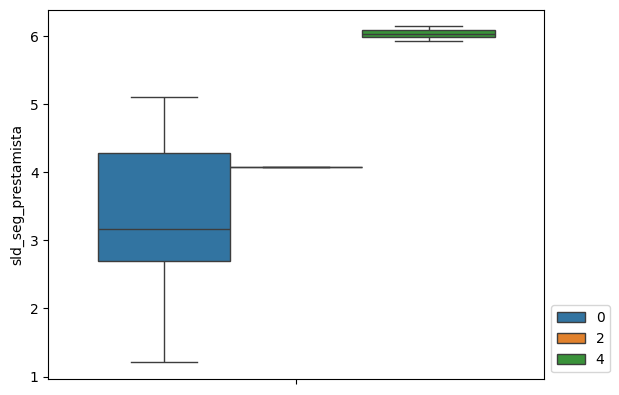

In [299]:
sns.boxplot(
    data=df_dependente\
        .assign(sld_seg_prestamista=lambda x: np.log1p(x.sld_seg_prestamista))\
        .query('sld_seg_prestamista != 0'),
    y='sld_seg_prestamista',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

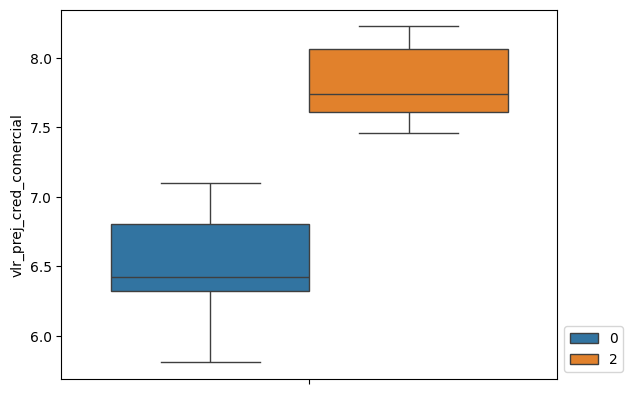

In [293]:
sns.boxplot(
    data=df_dependente\
        .assign(vlr_prej_cred_comercial=lambda x: np.log1p(x.vlr_prej_cred_comercial))\
        .query('vlr_prej_cred_comercial != 0'),
    y='vlr_prej_cred_comercial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

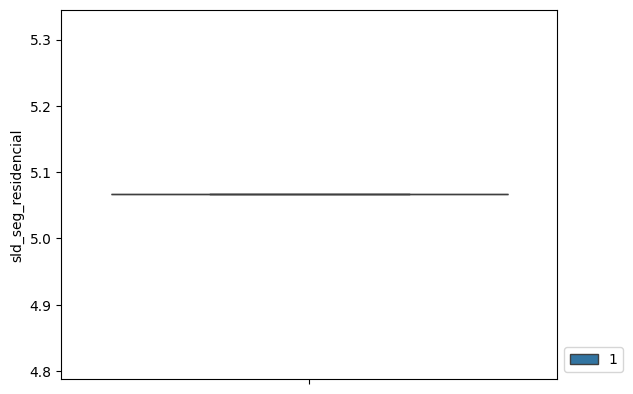

In [300]:
sns.boxplot(
    data=df_dependente\
        .assign(sld_seg_residencial=lambda x: np.log1p(x.sld_seg_residencial))\
        .query('sld_seg_residencial != 0'),
    y='sld_seg_residencial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

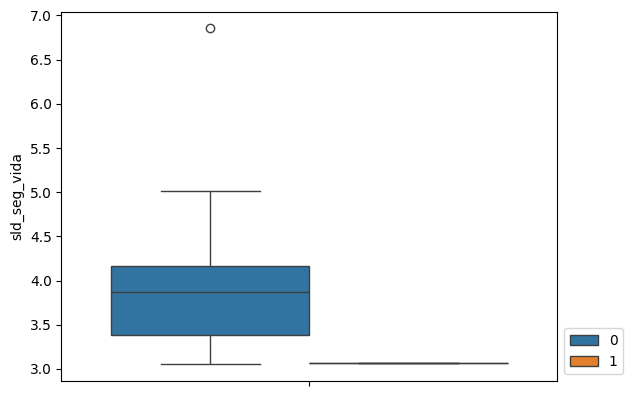

In [302]:
sns.boxplot(
    data=df_dependente\
        .assign(sld_seg_vida=lambda x: np.log1p(x.sld_seg_vida))\
        .query('sld_seg_vida != 0'),
    y='sld_seg_vida',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

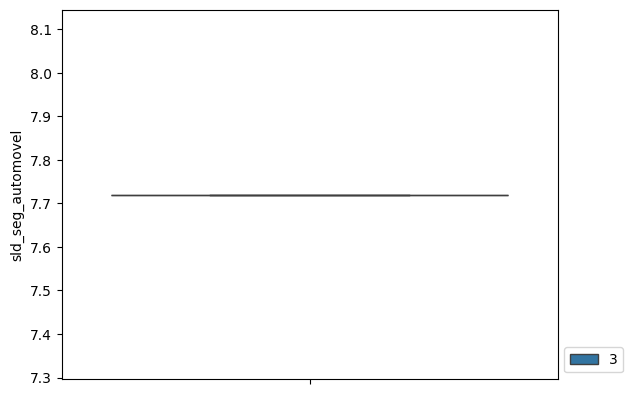

In [303]:
sns.boxplot(
    data=df_dependente\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
    y='sld_seg_automovel',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

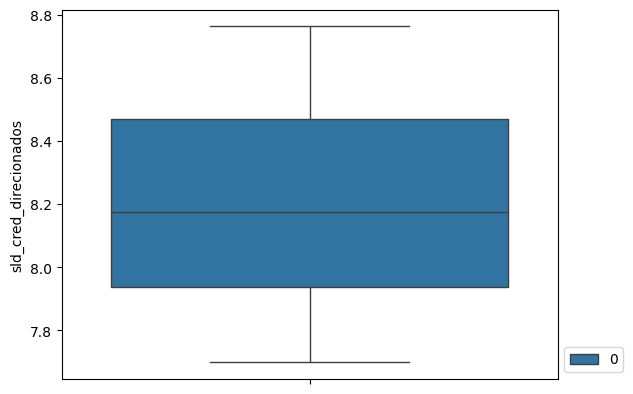

In [298]:
sns.boxplot(
    data=df_dependente\
        .assign(sld_cred_direcionados=lambda x: np.log1p(x.sld_cred_direcionados))\
        .query('sld_cred_direcionados != 0'),
    y='sld_cred_direcionados',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

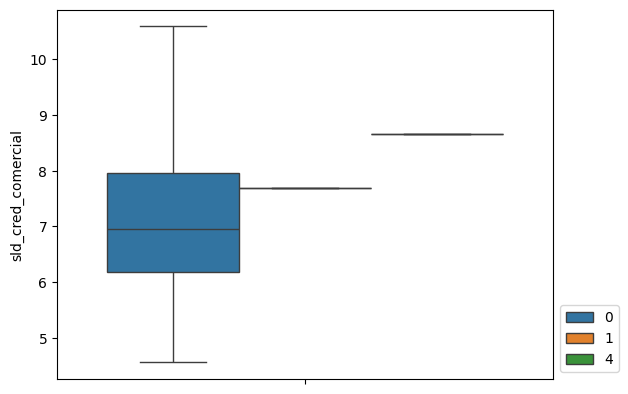

In [295]:
sns.boxplot(
    data=df_dependente\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
    y='sld_cred_comercial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

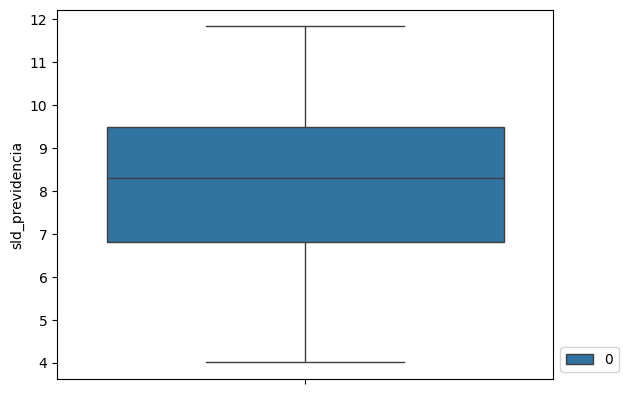

In [290]:
sns.boxplot(
    data=df_dependente\
        .assign(sld_previdencia=lambda x: np.log1p(x.sld_previdencia))\
        .query('sld_previdencia != 0'),
    y='sld_previdencia',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

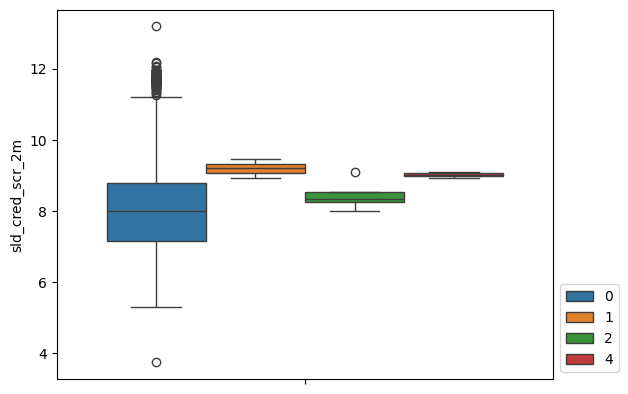

In [285]:
sns.boxplot(
    data=df_dependente\
        .assign(sld_cred_scr_2m=lambda x: np.log1p(x.sld_cred_scr_2m))\
        .query('sld_cred_scr_2m != 0'),
    y='sld_cred_scr_2m',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

## Obstinada

In [305]:
df_obstinada = df.query('Personalizar == "OBSTINADA"')
na_obs = df_obstinada.select_dtypes(include=np.number).corr('spearman').renda_mensal
df_obstinada = df_obstinada\
    .drop(columns=na_obs[na_obs.isna()].index)

In [311]:
df_cluster_obstinada = df_obstinada\
    .loc[:, [
        'isa', 'sld_previdencia',
        'sld_inad_ca_0', 
        'investimento_total',
        ] +
        df_obstinada.columns[df_obstinada.columns.str.startswith('sld_seg')].tolist() +
        df_obstinada.columns[df_obstinada.columns.str.startswith('sld_cred')].tolist() +
        df_obstinada.columns[df_obstinada.columns.str.startswith('mc_') & ~df_obstinada.columns.isin([
            'mc_assoc', 'mc_assoc_6_meses', 'mc_total'
        ])].tolist() +
        df_obstinada.filter(like='vlr_prej').columns.tolist()
    ]

df_cluster_obstinada = df_cluster_obstinada.loc[:, ~df_cluster_obstinada.columns.str.startswith('mc_')]
df_cluster_obstinada_columns = df_cluster_obstinada.columns.tolist()
df_cluster_obstinada = pd.DataFrame(
    StandardScaler().fit_transform(df_cluster_obstinada),
    columns=df_cluster_obstinada_columns
    )

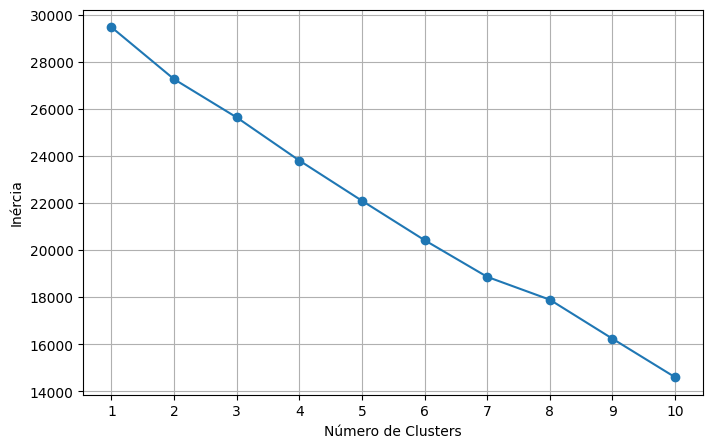

In [313]:
plot_inercia(df_cluster_obstinada)

In [314]:
choose_seed(df_cluster_obstinada)

Number of elements assigned to each cluster: [ 640    3 1331    5   39   54   33], 0
Number of elements assigned to each cluster: [1871  183    7    7   33    3    1], 1
Number of elements assigned to each cluster: [ 343 1636    1   51    3   31   40], 2
Number of elements assigned to each cluster: [ 343   13    5    1 1689    3   51], 3
Number of elements assigned to each cluster: [  38    3  633  263   31 1119   18], 4
Number of elements assigned to each cluster: [ 119    1   44    5   12    3 1921], 5
Number of elements assigned to each cluster: [  52 1246    5  740    5   54    3], 6
Number of elements assigned to each cluster: [1243  723   40   33    3   62    1], 7
Number of elements assigned to each cluster: [ 380   38 1607   45   27    3    5], 8
Number of elements assigned to each cluster: [1884    5    1    7    3    4  201], 9
Number of elements assigned to each cluster: [ 273 1767    1    5   38   18    3], 10
Number of elements assigned to each cluster: [2034   33   12    

In [315]:
kmeans_obstinada = KMeans(
    n_clusters=5,
    tol=1e-16,
    max_iter=5000,
    random_state=41
    ).fit(df_cluster_obstinada)
df_obstinada = df_obstinada.assign(
    subgrupo=kmeans_obstinada.labels_
    )\
    .sort_values('subgrupo')\
    .astype({'subgrupo': str})

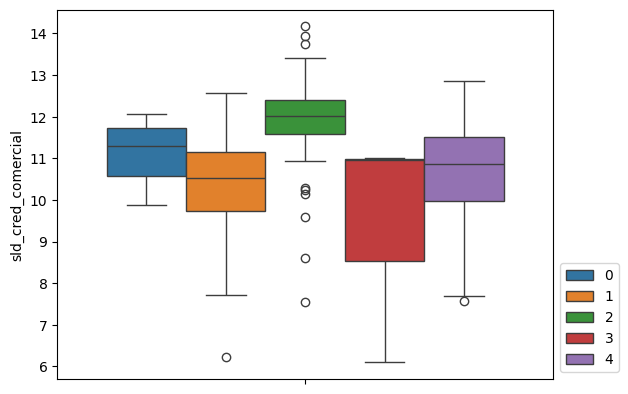

In [319]:
sns.boxplot(
    data=df_obstinada\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
    y='sld_cred_comercial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

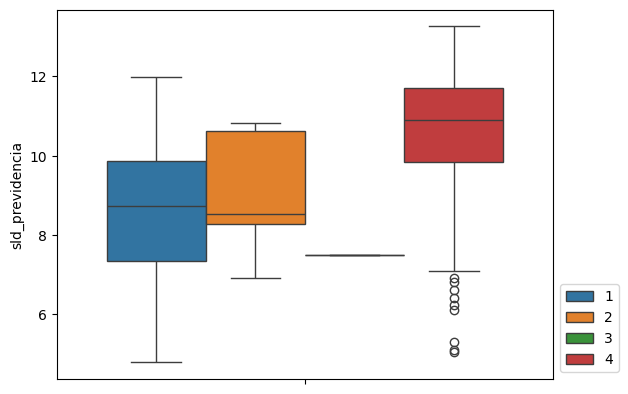

In [322]:
sns.boxplot(
    data=df_obstinada\
        .assign(sld_previdencia=lambda x: np.log1p(x.sld_previdencia))\
        .query('sld_previdencia != 0'),
    y='sld_previdencia',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

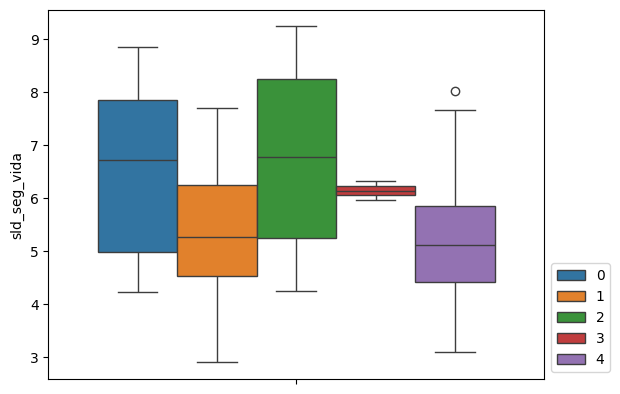

In [323]:
sns.boxplot(
    data=df_obstinada\
        .assign(sld_seg_vida=lambda x: np.log1p(x.sld_seg_vida))\
        .query('sld_seg_vida != 0'),
    y='sld_seg_vida',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

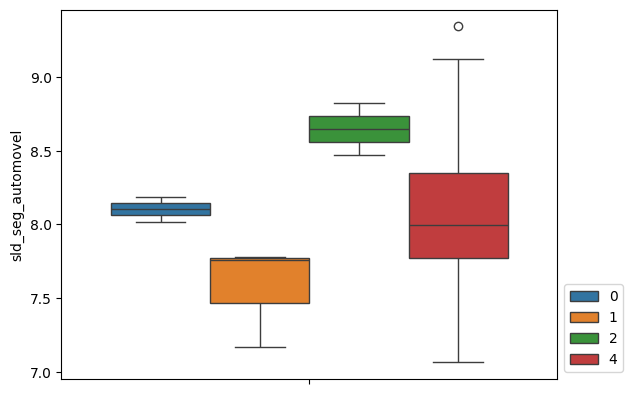

In [327]:
sns.boxplot(
    data=df_obstinada\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
    y='sld_seg_automovel',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

In [ ]:
sns.boxplot(
    data=df_obstinada\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
    y='sld_seg_automovel',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

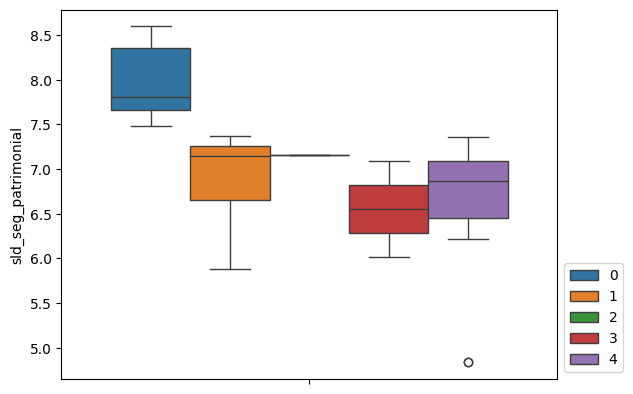

In [328]:
sns.boxplot(
    data=df_obstinada\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

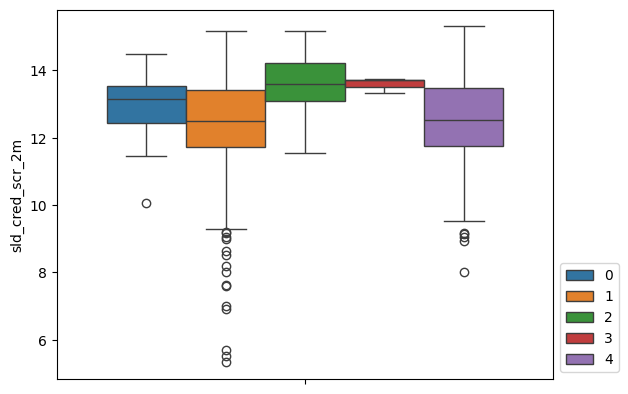

In [329]:
sns.boxplot(
    data=df_obstinada\
        .assign(sld_cred_scr_2m=lambda x: np.log1p(x.sld_cred_scr_2m))\
        .query('sld_cred_scr_2m != 0'),
    y='sld_cred_scr_2m',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

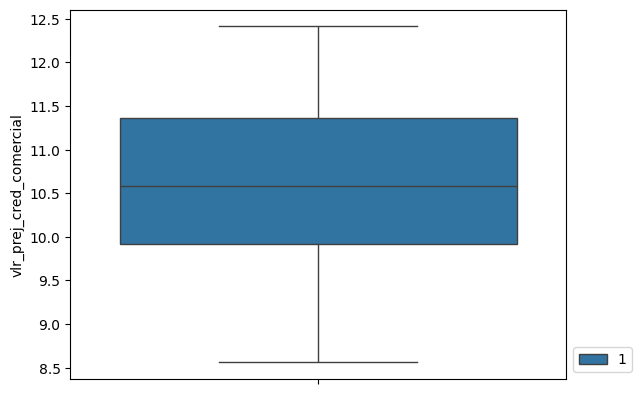

In [330]:
sns.boxplot(
    data=df_obstinada\
        .assign(vlr_prej_cred_comercial=lambda x: np.log1p(x.vlr_prej_cred_comercial))\
        .query('vlr_prej_cred_comercial != 0'),
    y='vlr_prej_cred_comercial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

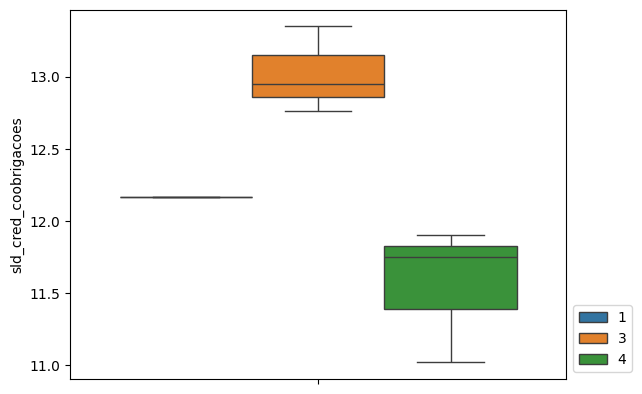

In [354]:
sns.boxplot(
    data=df_obstinada\
        .assign(sld_cred_coobrigacoes=lambda x: np.log1p(x.sld_cred_coobrigacoes))\
        .query('sld_cred_coobrigacoes != 0'),
    y='sld_cred_coobrigacoes',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

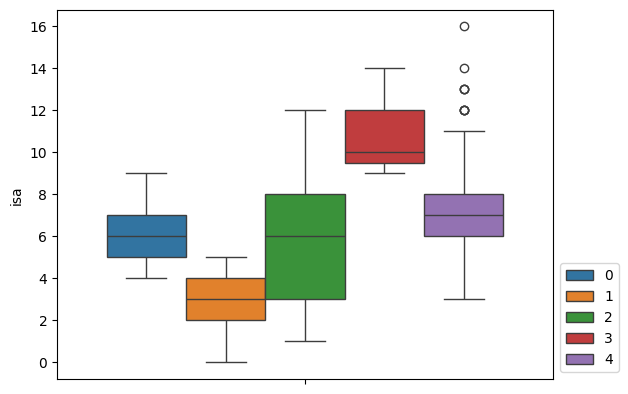

In [321]:
sns.boxplot(
    data=df_obstinada,
    y='isa',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

## Próspera

In [373]:
df_prospera = df.query('Personalizar == "PRÓSPERA"')
na_pros = df_prospera.select_dtypes(include=np.number).corr('spearman').renda_mensal
df_prospera = df_prospera\
    .drop(columns=na_obs[na_pros.isna()].index)

In [374]:
df_cluster_prospera = df_prospera\
    .loc[:, [
        'isa', 'sld_previdencia',
        'sld_inad_ca_0', 
        'investimento_total',
        ] +
        df_prospera.columns[df_prospera.columns.str.startswith('sld_seg')].tolist() +
        df_prospera.columns[df_prospera.columns.str.startswith('sld_cred')].tolist() +
        df_prospera.columns[df_prospera.columns.str.startswith('mc_') & ~df_prospera.columns.isin([
            'mc_assoc', 'mc_assoc_6_meses', 'mc_total'
        ])].tolist() +
        df_prospera.filter(like='vlr_prej').columns.tolist()
    ]

df_cluster_prospera = df_cluster_prospera.loc[:, ~df_cluster_prospera.columns.str.startswith('mc_')]
df_cluster_prospera_columns = df_cluster_prospera.columns.tolist()
df_cluster_prospera = pd.DataFrame(
    StandardScaler().fit_transform(df_cluster_prospera),
    columns=df_cluster_prospera_columns
    )

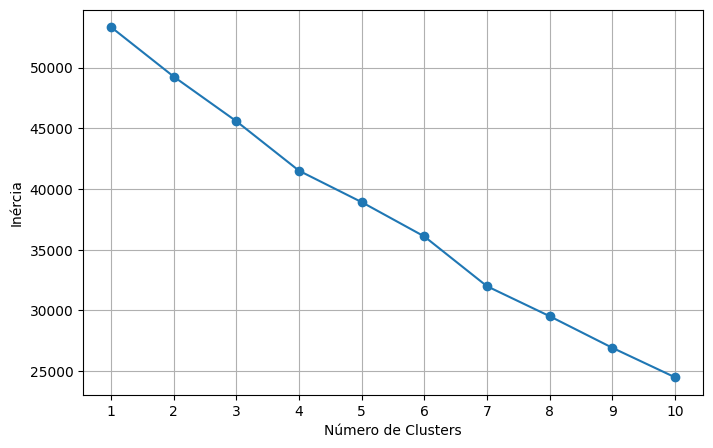

In [377]:
plot_inercia(df_cluster_prospera)

In [378]:
choose_seed(df_cluster_prospera, 5)

Number of elements assigned to each cluster: [ 111 3979    1    1   10], 0
Number of elements assigned to each cluster: [1427  118 2476    1   80], 1
Number of elements assigned to each cluster: [1429 2563    1   95   14], 2
Number of elements assigned to each cluster: [1413   10   71 2565   43], 3
Number of elements assigned to each cluster: [ 130    1 3853  108   10], 4
Number of elements assigned to each cluster: [2562 1439   99    1    1], 5
Number of elements assigned to each cluster: [1019 2963    1   10  109], 6
Number of elements assigned to each cluster: [ 112 3987    1    1    1], 7
Number of elements assigned to each cluster: [1105    1 2965   10   21], 8
Number of elements assigned to each cluster: [  37  113 1351 2600    1], 9
Number of elements assigned to each cluster: [ 325   14 3761    1    1], 10
Number of elements assigned to each cluster: [2576   96 1428    1    1], 11
Number of elements assigned to each cluster: [2602  111 1381    1    7], 12
Number of elements ass

In [379]:
kmeans_prospera = KMeans(
    n_clusters=5,
    tol=1e-16,
    max_iter=5000,
    random_state=82
    ).fit(df_cluster_prospera)
df_prospera = df_prospera.assign(
    subgrupo=kmeans_prospera.labels_
    )\
    .sort_values('subgrupo')\
    .astype({'subgrupo': str})

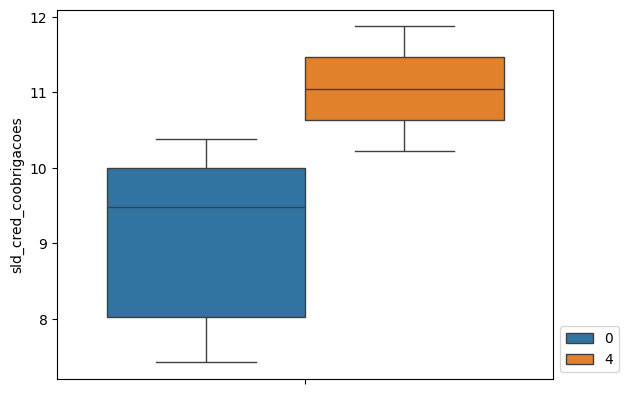

In [382]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_cred_coobrigacoes=lambda x: np.log1p(x.sld_cred_coobrigacoes))\
        .query('sld_cred_coobrigacoes != 0'),
    y='sld_cred_coobrigacoes',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

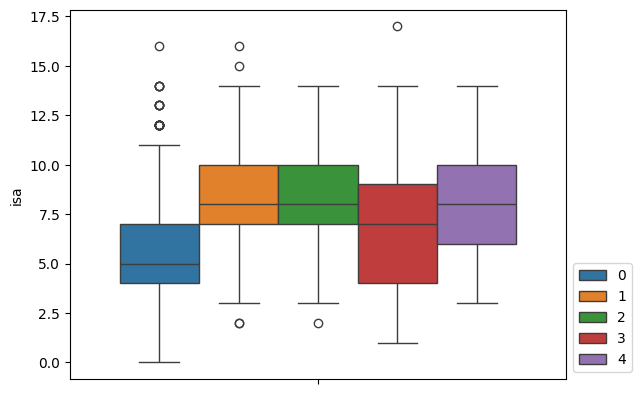

In [383]:
sns.boxplot(
    data=df_prospera,
    y='isa',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

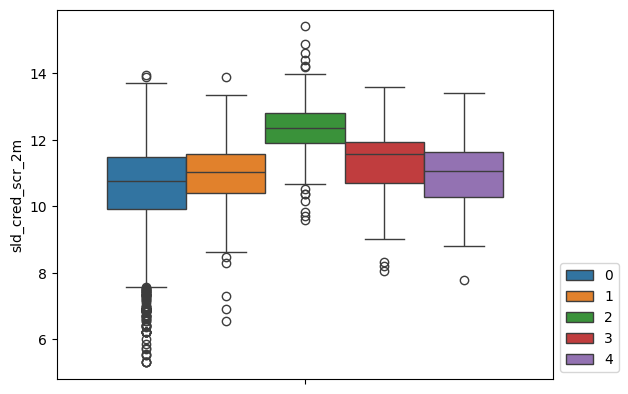

In [385]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_cred_scr_2m=lambda x: np.log1p(x.sld_cred_scr_2m))\
        .query('sld_cred_scr_2m != 0'),
    y='sld_cred_scr_2m',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

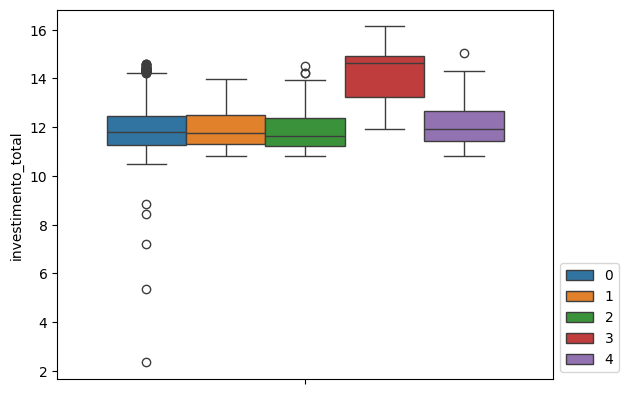

In [393]:
sns.boxplot(
    data=df_prospera\
        .assign(investimento_total=lambda x: np.log1p(x.investimento_total))\
        .query('investimento_total != 0'),
    y='investimento_total',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

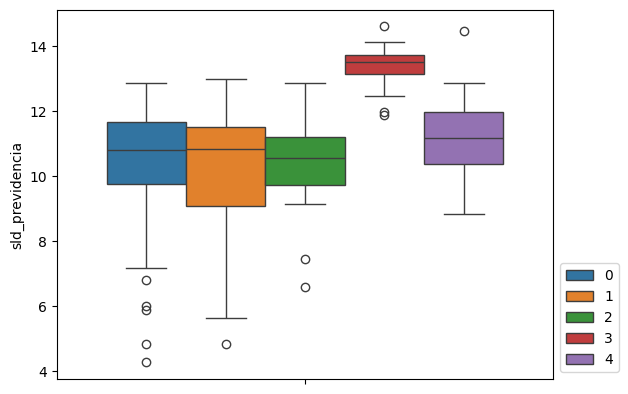

In [394]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_previdencia=lambda x: np.log1p(x.sld_previdencia))\
        .query('sld_previdencia != 0'),
    y='sld_previdencia',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

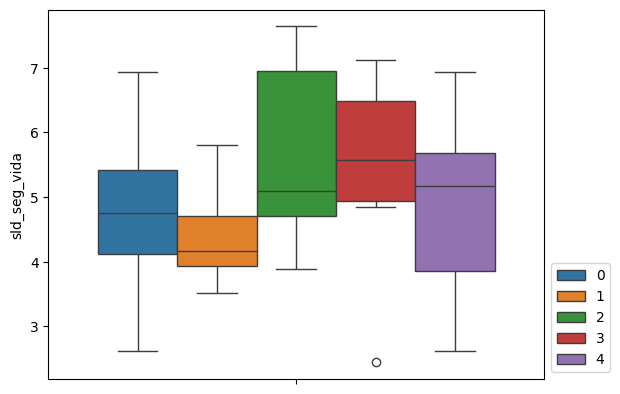

In [395]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_seg_vida=lambda x: np.log1p(x.sld_seg_vida))\
        .query('sld_seg_vida != 0'),
    y='sld_seg_vida',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

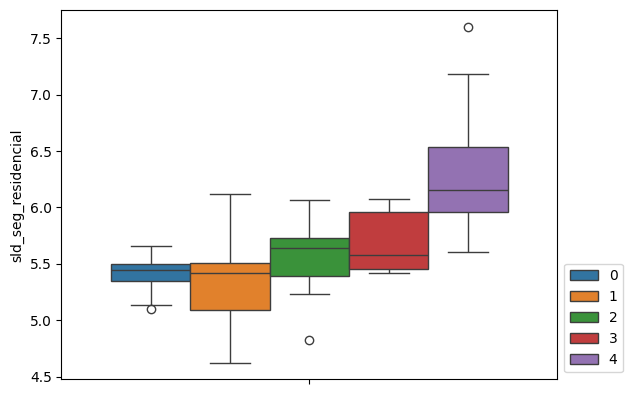

In [403]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_seg_residencial=lambda x: np.log1p(x.sld_seg_residencial))\
        .query('sld_seg_residencial != 0'),
    y='sld_seg_residencial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

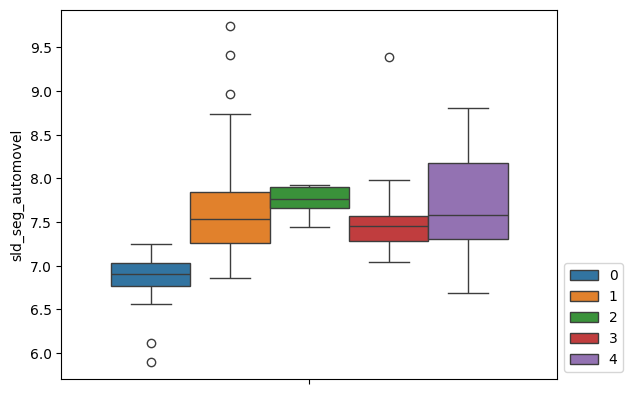

In [401]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
    y='sld_seg_automovel',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

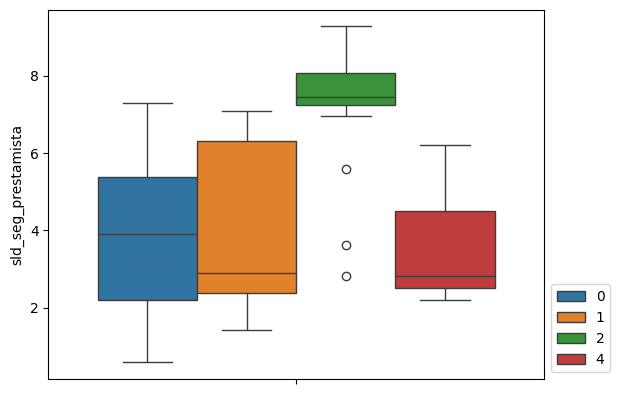

In [404]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_seg_prestamista=lambda x: np.log1p(x.sld_seg_prestamista))\
        .query('sld_seg_prestamista != 0'),
    y='sld_seg_prestamista',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

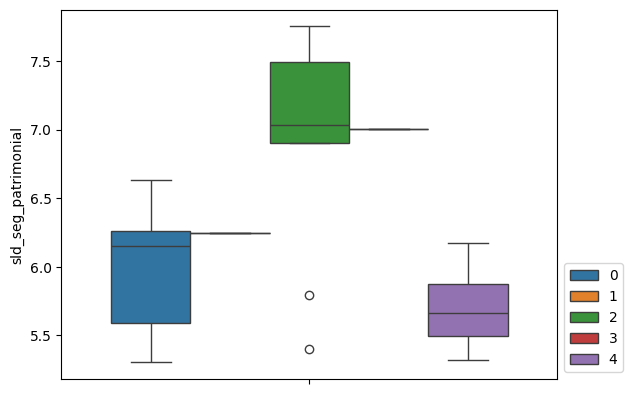

In [412]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

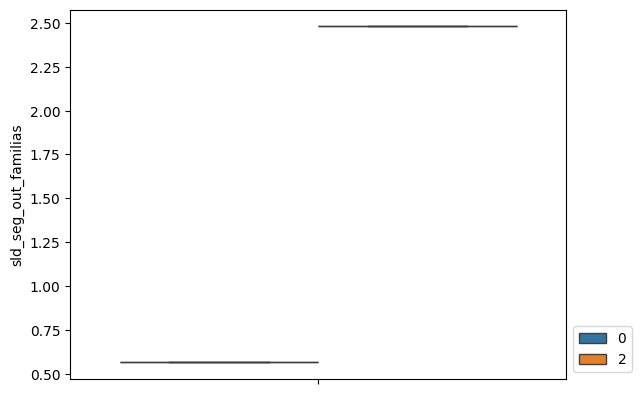

In [408]:
sns.boxplot(
    data=df_prospera\
        .assign(sld_seg_out_familias=lambda x: np.log1p(x.sld_seg_out_familias))\
        .query('sld_seg_out_familias != 0'),
    y='sld_seg_out_familias',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

## Constante

In [414]:
df_constante = df.query('Personalizar == "CONSTANTE"')
na_cons = df_constante.select_dtypes(include=np.number).corr('spearman').renda_mensal
df_constante = df_constante\
    .drop(columns=na_cons[na_cons.isna()].index)

In [415]:
df_cluster_constante = df_constante\
    .loc[:, [
        'isa', 'sld_previdencia',
        'sld_inad_ca_0', 
        'investimento_total',
        ] +
        df_constante.columns[df_constante.columns.str.startswith('sld_seg')].tolist() +
        df_constante.columns[df_constante.columns.str.startswith('sld_cred')].tolist() +
        df_constante.columns[df_constante.columns.str.startswith('mc_') & ~df_constante.columns.isin([
            'mc_assoc', 'mc_assoc_6_meses', 'mc_total'
        ])].tolist() +
        df_constante.filter(like='vlr_prej').columns.tolist()
    ]

df_cluster_constante = df_cluster_constante.loc[:, ~df_cluster_constante.columns.str.startswith('mc_')]
df_cluster_constante_columns = df_cluster_constante.columns.tolist()
df_cluster_constante = pd.DataFrame(
    StandardScaler().fit_transform(df_cluster_constante),
    columns=df_cluster_constante_columns
    )

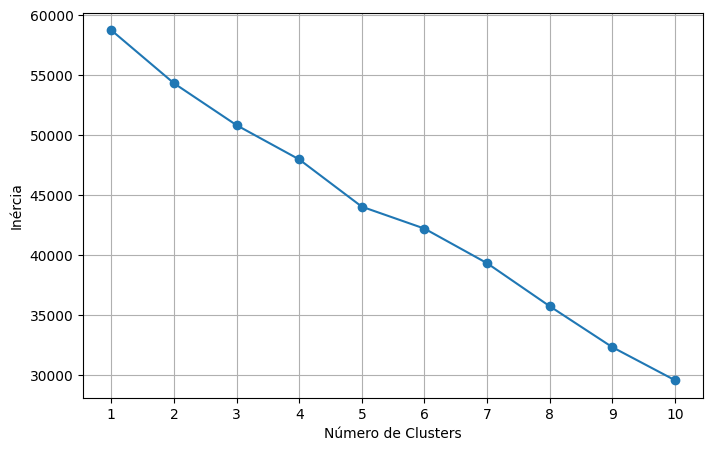

In [427]:
plot_inercia(df_cluster_constante)

In [428]:
choose_seed(df_cluster_constante, 5)

Number of elements assigned to each cluster: [3373  416  389   13    6], 0
Number of elements assigned to each cluster: [3461  216    6  472   42], 1
Number of elements assigned to each cluster: [3633    3   89   19  453], 2
Number of elements assigned to each cluster: [  48 3604   12  514   19], 3
Number of elements assigned to each cluster: [ 235 3424   10  527    1], 4
Number of elements assigned to each cluster: [3569   19  221  382    6], 5
Number of elements assigned to each cluster: [3691    1    6    3  496], 6
Number of elements assigned to each cluster: [3594    6  202  394    1], 7
Number of elements assigned to each cluster: [ 386   10 3759   19   23], 8
Number of elements assigned to each cluster: [ 449 3723   18    6    1], 9
Number of elements assigned to each cluster: [  31 3228  580    6  352], 10
Number of elements assigned to each cluster: [3756  395   20   20    6], 11
Number of elements assigned to each cluster: [3608  557   10    3   19], 12
Number of elements ass

In [429]:
kmeans_constante = KMeans(
    n_clusters=5,
    tol=1e-16,
    max_iter=5000,
    random_state=81
    ).fit(df_cluster_constante)
df_constante = df_constante.assign(
    subgrupo=kmeans_constante.labels_
    )\
    .sort_values('subgrupo')\
    .astype({'subgrupo': str})

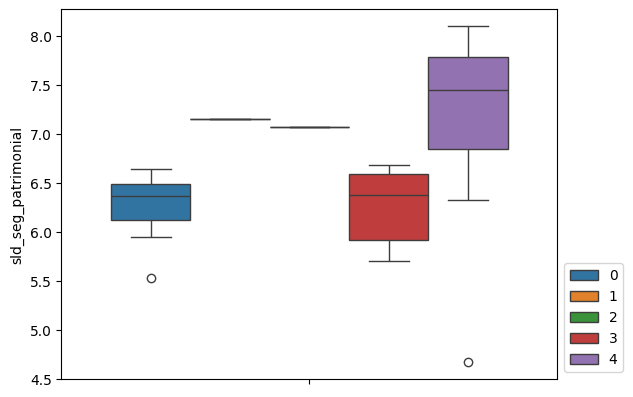

In [431]:
sns.boxplot(
    data=df_constante\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

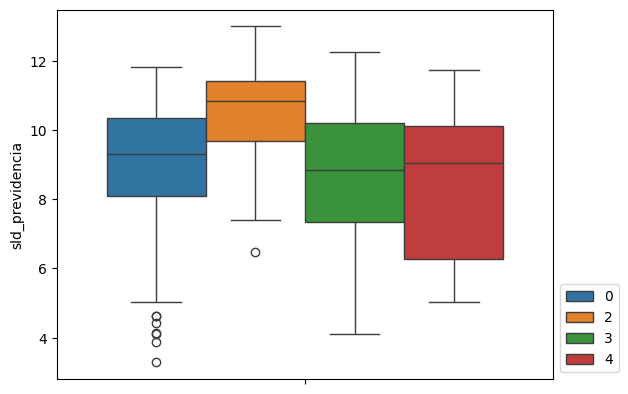

In [434]:
sns.boxplot(
    data=df_constante\
        .assign(sld_previdencia=lambda x: np.log1p(x.sld_previdencia))\
        .query('sld_previdencia != 0'),
    y='sld_previdencia',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

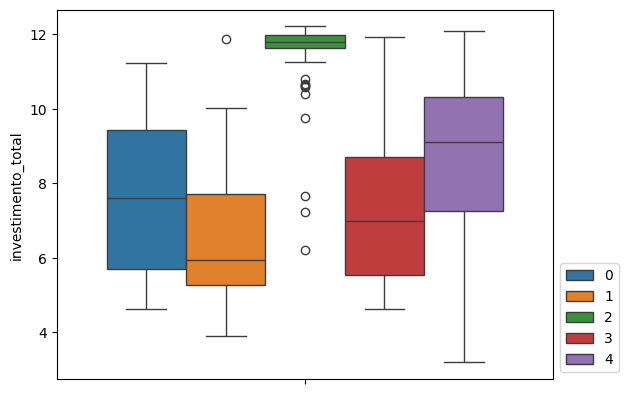

In [435]:
sns.boxplot(
    data=df_constante\
        .assign(investimento_total=lambda x: np.log1p(x.investimento_total))\
        .query('investimento_total != 0'),

    y='investimento_total',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

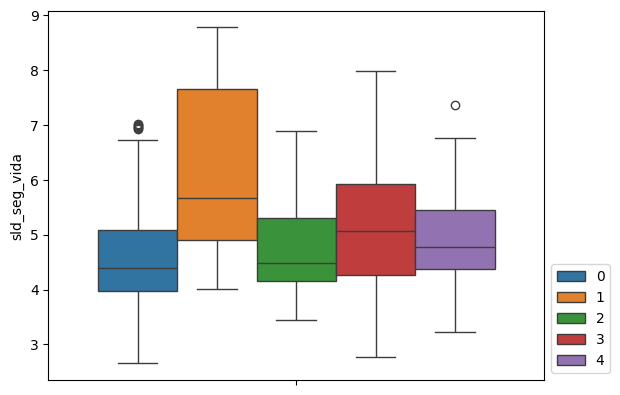

In [439]:
sns.boxplot(
    data=df_constante\
        .assign(sld_seg_vida=lambda x: np.log1p(x.sld_seg_vida))\
        .query('sld_seg_vida != 0'),
        
    y='sld_seg_vida',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

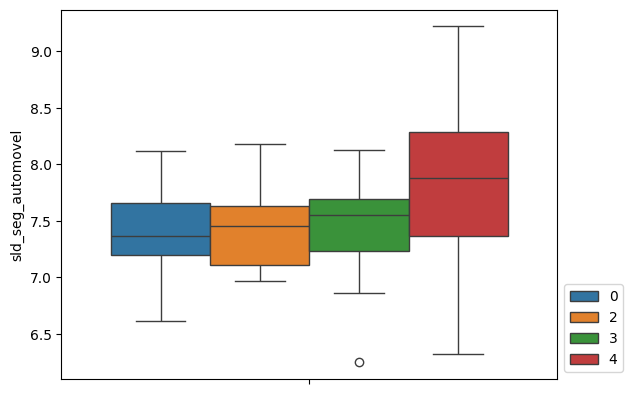

In [440]:
sns.boxplot(
    data=df_constante\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
        
    y='sld_seg_automovel',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

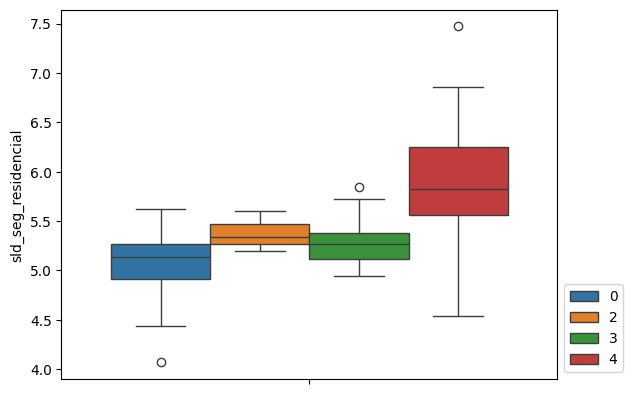

In [442]:
sns.boxplot(
    data=df_constante\
        .assign(sld_seg_residencial=lambda x: np.log1p(x.sld_seg_residencial))\
        .query('sld_seg_residencial != 0'),
        
    y='sld_seg_residencial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

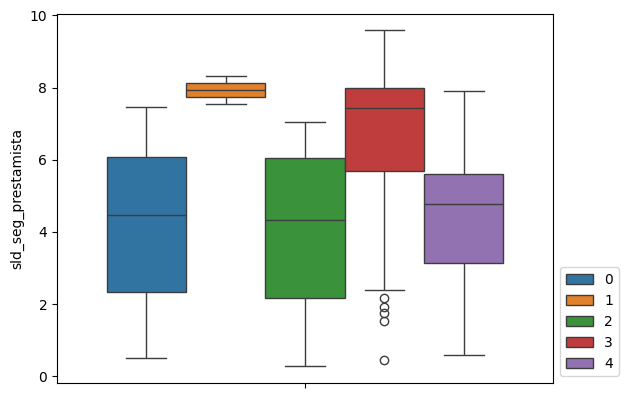

In [445]:
sns.boxplot(
    data=df_constante\
        .assign(sld_seg_prestamista=lambda x: np.log1p(x.sld_seg_prestamista))\
        .query('sld_seg_prestamista != 0'),
        
    y='sld_seg_prestamista',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

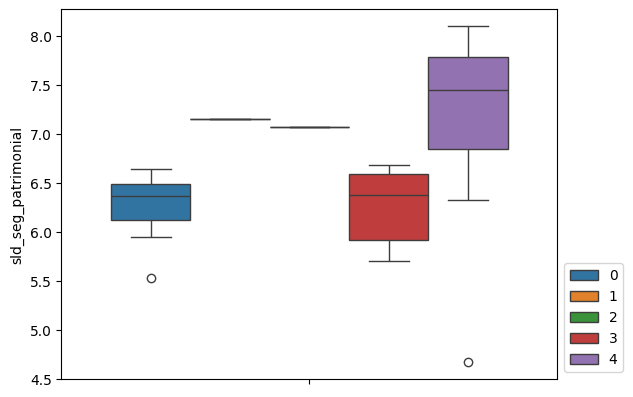

In [447]:
sns.boxplot(
    data=df_constante\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
        
    y='sld_seg_patrimonial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

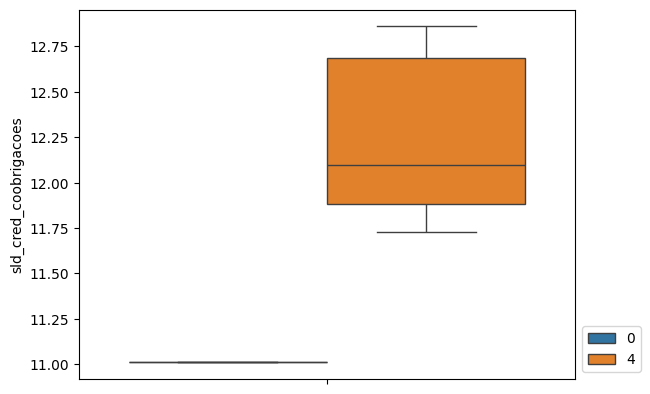

In [448]:
sns.boxplot(
    data=df_constante\
        .assign(sld_cred_coobrigacoes=lambda x: np.log1p(x.sld_cred_coobrigacoes))\
        .query('sld_cred_coobrigacoes != 0'),
        
    y='sld_cred_coobrigacoes',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

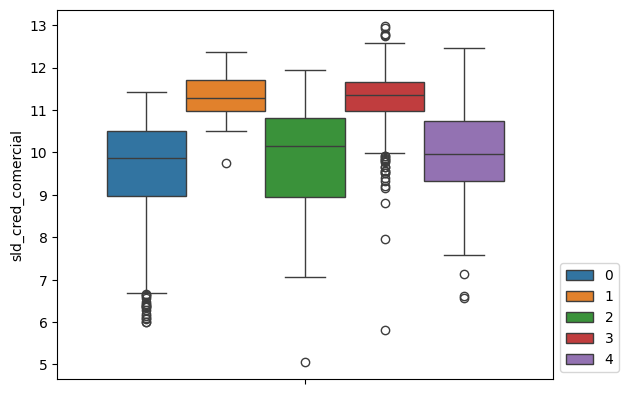

In [449]:
sns.boxplot(
    data=df_constante\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
        
    y='sld_cred_comercial',
    hue='subgrupo'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

In [436]:
df_cluster_constante.columns

Index(['isa', 'sld_previdencia', 'sld_inad_ca_0', 'investimento_total',
       'sld_seg_vida', 'sld_seg_automovel', 'sld_seg_residencial',
       'sld_seg_prestamista', 'sld_seg_patrimonial', 'sld_seg_out_familias',
       'sld_cred_coobrigacoes', 'sld_cred_comercial', 'sld_cred_scr_2m',
       'vlr_prej_cred_comercial'],
      dtype='object')